
# Trabalho 3

---
---
## SME0878 Mineração Estatística de Dados - 1/2024
### Cícero Coimbra Fonseca - 12624912
### Gabriel Almeida Ferreira  - 12693924
### Helber Martins de Moraes - 10260181
---


# Introdução

Nessa terceira e ultima parte do projeto envolvendo os dados do GAPSI, buscamos desenvolver modelos para prever a ocorrência de trantorno mental comum em estudantes de graduação, beaseado em respostas de questionário.

Até aqui, já foram realizadas a descrição do problema e dos dados, seu pré-processamento, análise exploratória e visualizações, no trabalho 1. No trabalho 2, seguimos com técnicas de agrupamento, para traçar um eventual grupo de risco, e redução de dimensionalidade.

Os códigos produzidos nesses trabalhos anteriores, não serão introduzidos nesse relatório, já que foram feitos usando a liguagem Python. Para essa fase de modelagem, decidimos usar diretamente um ambiente de R no Google Colab, devido à maior quantidade de pacotes e recursos disponíveis para se aprofundar no tema.

As conclusões mais relevantes trazidas para essa etapa, foram os resultados ruins obtidos a partir dos métodos de redução de dimensionalidade, decorrente de relações complexas entre as variáveis, que não são muito informativas entre si. A partir disso, a fase de modelagem se inicia considerando todas as variáveis, com exceção das poucas com alta correlacão, que foram vislumbradas na análise exploratórias e serão discriminadas na seção apropriada.


# Preliminares





Ao longo do desenvolvimento deste trabalho, observou-se a necessidade de utilizar modelos bayesianos para modelar os dados, especialmente devido à separação total e/ou quase total de algumas variáveis categóricas. Isso é comum em conjuntos de dados pequenos com variáveis categóricas que possuem muitos níveis. Além disso, ao considerar a distribuição categórica, onde são modeladas três probabilidades, é necessário empregar dois modelos de regressão, o que reduz significativamente os graus de liberdade do modelo. Nessas circunstâncias, não é fácil alcançar convergência utilizando métodos de inferência mais tradicionais. Quando a convergência não é alcançada, os estimadores se tornam instáveis e os intervalos de confiança se ampliam, resultando em inferências questionáveis.

Se por um lado é possível adicionar informação a priori para regularizar os coeficientes de regressão e evitar estimativas extremas, por outro, os modelos bayesianos são computacionalmente intensivos e existem poucos pacotes estatísticos (em comparação com métodos frequentistas e pacotes de aprendizado de máquina) que realizam o ajuste de modelos categóricos. Neste trabalho, exploramos o pacote brms, que utiliza o Stan para amostrar da posteriori, para continuar com a análise bayesiana. Escolhemos este pacote devido à facilidade que ele proporciona, fornecendo uma interface em R semelhante ao glm e ao gam.


Todavia, surgiram algumas limitações que alteraram o plano de análise, dado que o pacote brms não oferece suporte para regressão categórica com funções de ligação além da logit. Além disso, os modelos que utilizam splines consomem muita RAM, o que pode afetar a execução na seção do Colab.

Para servir como base de comparação de métricas, ajustamos modelos em Python com auxilio do Pycaret, que podem são ser muito interpretáveis (podem ser executados no notebook: https://colab.research.google.com/drive/1qNnHfs165UCmwOow-uu-DF2jCtoxcmGa?usp=sharing). O melhor modelo ajustado, após tuning, alcançou acurácia igual a 62%.

# Ambiente

In [ ]:
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "4.1"

$year
[1] "2024"

$month
[1] "06"

$day
[1] "14"

$`svn rev`
[1] "86737"

$language
[1] "R"

$version.string
[1] "R version 4.4.1 (2024-06-14)"

$nickname
[1] "Race for Your Life"

In [ ]:
install.packages('brms')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘plyr’, ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘RcppParallel’, ‘QuickJSR’, ‘RcppEigen’, ‘BH’, ‘checkmate’, ‘tensorA’, ‘distributional’, ‘ggridges’, ‘reshape2’, ‘mvtnorm’, ‘Brobdingnag’, ‘globals’, ‘listenv’, ‘parallelly’, ‘Rcpp’, ‘rstan’, ‘loo’, ‘posterior’, ‘rstantools’, ‘bayesplot’, ‘bridgesampling’, ‘future’, ‘future.apply’, ‘matrixStats’, ‘nleqslv’, ‘coda’, ‘abind’




In [ ]:
install.packages('caret')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’




In [ ]:
install.packages('car')



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
install.packages('corrplot')
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [ ]:
library(bayesplot)

This is bayesplot version 1.11.1

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [ ]:
n_cores = 2

In [ ]:
install.packages("rstatix")
library(rstatix)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [ ]:
library(forcats)

In [ ]:
install.packages("ggpubr")
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’


Loading required package: ggplot2



In [ ]:
library(mgcv)

Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.



In [ ]:
library(tidyverse)
library(readr)
library('brms')
library(car)
library(caret)
library(corrplot)
library(bayesplot)
library(rstatix)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()     masks base::%||%()
✖ dplyr::collapse() masks nlme::collapse()
✖ dplyr::filter()   masks rstatix::filter(), stats::filter()
✖ dplyr::lag()      masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Rcpp

Loading 'brms' package (version 2.21.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following objects are masked from ‘package:mgcv’:

    s, t2


The following object is masked from ‘package:bayesplot’:

    rhat


The following object is

In [ ]:
library(rstan)

Loading required package: StanHeaders


rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)



Attaching package: ‘rstan’


The following object is masked from ‘package:tidyr’:

    extract




# Processamento

A primeira parte do processamento consiste na leitura dos dados e na verificação de como as variáveis foram codificadas

In [ ]:

df <- read_csv("https://raw.githubusercontent.com/Gabrieldpll/GAPSI_mineracao/main/dados_GAPSI.csv")
View(df)
# Salva id em uma variável caso seja necessário consultá-lo depois
id <- df$ID
# remove o id do df (evitar problemas na modelagem)
df <-  df %>% select(-c(ID))


Rows: 362 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Q02, Q03, Q04, Q05, moradia, Q09, Q10, Q11, Q13, Q15, Q17, Q19, Q2...
dbl (10): ID, Q06, Q20, score_PercepDif, scoreSRQ, scoreDifAcad, scoreRC, sc...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Q02,Q03,Q04,Q05,Q06,moradia,Q09,Q10,Q11,⋯,Q20,Q21,score_PercepDif,nivelSRQ,scoreSRQ,scoreDifAcad,scoreRC,scorePTC,scoreQ52,scoreQ53
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Até 19,Homem cisgênero,Preta ou parda,Heterossexual,234,Não,EESC,Engenharia Civil,2023,⋯,5,Não,1.833333,Nível 0,2,4.333333,3.2,2.0,3.50,3.50
2,20 a 25,Mulher cisgênero,Branca,Bissexual,110,Não,Eng Comp,Engenharia de Computação,2021,⋯,5,Sim,2.833333,Nível 1,9,2.166667,2.6,0.8,3.75,3.75
3,Até 19,Mulher cisgênero,Branca,Heterossexual,1415,Não,EESC,Engenharia Mecânica,2023,⋯,5,Sim,2.166667,Nível 1,9,2.500000,3.4,1.6,2.50,3.25
4,20 a 25,Mulher cisgênero,Branca,Bissexual,800,Não,ICMC,Sistemas de Informação - Bacharelado,2023,⋯,5,Sim,3.500000,Nível 1,13,1.333333,2.8,0.6,3.25,3.25
5,20 a 25,Mulher cisgênero,Preta ou parda,Outras Orientações,55,Não,IQSC,Química - Bacharelado,2022,⋯,3,Sim,3.833333,Nível 1,13,3.666667,1.8,1.6,3.00,2.25
6,20 a 25,Homem cisgênero,Preta ou parda,Heterossexual,400,Não,EESC,Engenharia Elétrica - Sistemas de Energia e Automação,2021,⋯,5,Não,1.000000,Nível 0,2,3.833333,2.6,1.6,3.00,3.50
7,20 a 25,Mulher cisgênero,Branca,Heterossexual,140,Não,EESC,Engenharia Ambiental,2021,⋯,3,Sim,4.500000,Nível 2,18,2.333333,2.6,1.2,4.00,3.50
8,Até 19,Homem cisgênero,Preta ou parda,Heterossexual,2672,Sim,IFSC,Física - Bacharelado,2023,⋯,5,Não,3.000000,Nível 1,7,4.666667,3.8,1.6,2.00,2.00
9,Até 19,Mulher cisgênero,Branca,Bissexual,0,Não,IAU,Arquitetura e Urbanismo,2023,⋯,5,Não,2.166667,Nível 2,14,3.166667,2.2,1.6,4.50,3.50


In [ ]:
# verifica se tudo esta codificado corretamente
glimpse(df)

Rows: 362
Columns: 23
$ Q02             <chr> "Até 19", "20 a 25", "Até 19", "20 a 25", "20 a 25", "…
$ Q03             <chr> "Homem cisgênero", "Mulher cisgênero", "Mulher cisgêne…
$ Q04             <chr> "Preta ou parda", "Branca", "Branca", "Branca", "Preta…
$ Q05             <chr> "Heterossexual", "Bissexual", "Heterossexual", "Bissex…
$ Q06             <dbl> 234, 110, 1415, 800, 55, 400, 140, 2672, 0, 44, 400, 2…
$ moradia         <chr> "Não", "Não", "Não", "Não", "Não", "Não", "Não", "Sim"…
$ Q09             <chr> "EESC", "Eng Comp", "EESC", "ICMC", "IQSC", "EESC", "E…
$ Q10             <chr> "Engenharia Civil", "Engenharia de Computação", "Engen…
$ Q11             <chr> "2023", "2021", "2023", "2023", "2022", "2021", "2021"…
$ Q13             <chr> "Não, mas já tive emprego (formal ou informalmente) e …
$ Q15             <chr> "Não", "Não", "Não", "Não", "Sim", "Não", "Sim", "Não"…
$ Q17             <chr> "Não", "Não", "Não", "Sim", "Sim", "Não", "Não", "Não"…
$ Q19             

## Atributos categóricos

As variáveis categóricas merecem atenção no processamento. No R, elas são codificadas como fatores. Um fator é uma estrutura de dados utilizada para representar variáveis categóricas. Em modelos de regressão, o R processa os fatores utilizando codificação dummy, onde o primeiro nível é adotado como referência, a menos que o usuário indique o contrário.

In [ ]:
# codificar as colunas como fatores

df <- df %>% mutate_if(is.character, as.factor)

In [ ]:
glimpse(df)

Rows: 362
Columns: 23
$ Q02             <fct> Até 19, 20 a 25, Até 19, 20 a 25, 20 a 25, 20 a 25, 20…
$ Q03             <fct> Homem cisgênero, Mulher cisgênero, Mulher cisgênero, M…
$ Q04             <fct> Preta ou parda, Branca, Branca, Branca, Preta ou parda…
$ Q05             <fct> Heterossexual, Bissexual, Heterossexual, Bissexual, Ou…
$ Q06             <dbl> 234, 110, 1415, 800, 55, 400, 140, 2672, 0, 44, 400, 2…
$ moradia         <fct> Não, Não, Não, Não, Não, Não, Não, Sim, Não, Não, Não,…
$ Q09             <fct> EESC, Eng Comp, EESC, ICMC, IQSC, EESC, EESC, IFSC, IA…
$ Q10             <fct> Engenharia Civil, Engenharia de Computação, Engenharia…
$ Q11             <fct> 2023, 2021, 2023, 2023, 2022, 2021, 2021, 2023, 2023, …
$ Q13             <fct> "Não, mas já tive emprego (formal ou informalmente) e …
$ Q15             <fct> Não, Não, Não, Não, Sim, Não, Sim, Não, Não, Não, Não,…
$ Q17             <fct> Não, Não, Não, Sim, Sim, Não, Não, Não, Sim, Sim, Sim,…
$ Q19             

In [ ]:
levels(df$Q05)

[1] "Bissexual"          "Heterossexual"      "Homossexual"       
[4] "Outras Orientações"

In [ ]:
# nivel de ref para Q02 foi modificado para Heterossexual
df['Q05'] <-relevel(df$Q05 , 'Heterossexual')

In [ ]:
levels(df$Q05)

[1] "Heterossexual"      "Bissexual"          "Homossexual"       
[4] "Outras Orientações"

In [ ]:
levels(df$Q02)

[1] "20 a 25"     "Até 19"      "mais que 25"

In [ ]:
# nivel de ref para Q02 foi modificado para até 19
df['Q02'] <-relevel(df$Q02 , 'Até 19')

In [ ]:
levels(df$Q02)

[1] "Até 19"      "20 a 25"     "mais que 25"

In [ ]:
levels(df$Q04)

[1] "Amarela/Asiática" "Branca"           "Preta ou parda"

In [ ]:
# nivel de ref para Q04 Branca

df['Q04'] <-relevel(df$Q04 , 'Branca')

In [ ]:
levels(df$Q04)

[1] "Branca"           "Amarela/Asiática" "Preta ou parda"

In [ ]:
#  Q20: Possui as condições adequadas para minha permanência material na graduação. Foi codificada  como categórica.

In [ ]:
df['Q20'] <- as.factor(df$Q20)
levels(df$Q20)

[1] "1" "2" "3" "4" "5"

In [ ]:
# Removemos  scoreSRQ (utilizada na transformação da variável resposta)
# removemos Q10(curso de graduação) , pois é redudante com a questão Q09 (departamento) e tem mais categorias
df = df %>% select(-c('scoreSRQ', 'Q10'))

# Modelos com enfoque explicativo
Agora que processamos os dados, inicialmente focamos em modelos mais explicáveis para tentar interpretar a variação observada nos dados.



A análise de caminhos (Path Analysis) foi inicialmente adotada em nosso projeto para tentar investigar relações entre as covariáveis. No entanto, enfrentamos desafios significativos devido à estrutura intrincada dos dados (como sugerido na parte 2), o que resultou em limitações consideráveis na obtenção de resultados confiáveis. Dessa forma, para um modelo razoávelmente explicativo, buscamos como alternativa uma metodologia de redes bayesianas, que detalhamos abaixo.

In [ ]:
install.packages('lavaan')
library('lavaan')
install.packages('janitor')
library('janitor')
install.packages('infotheo')
library(infotheo)
install.packages("bnlearn")
library("bnlearn")
install.packages("BiocManager")
BiocManager::install("Rgraphviz")
library('Rgraphviz')
install.packages('gRain')
library('gRain')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘pbivnorm’, ‘quadprog’


This is lavaan 0.6-18
lavaan is FREE software! Please report any bugs.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘janitor’


The following object is masked from ‘package:rstatix’:

    make_clean_names


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘bnlearn’


The following object is masked from ‘package:infotheo’:

    discretize


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", packa

In [ ]:
#df_sem = matriz_modelo %>% data.frame
#df_sem$NivelSRQ = ordered(df$nivelSRQ)
#df_sem <- df_sem %>% janitor::clean_names()
#df_sem$q20 = ordered(df_sem$q20)
#df_sem$q11 = ordered(df$Q11)

#df_sem %>% glimpse


In [ ]:
df_sem_2 = df[,]
df_sem_2$nivelSRQ = df$nivelSRQ %>% as.numeric
df_sem_2$scoreSRQ <- NULL
df_sem_22 <- df_sem_2
df_sem_22$nivelSRQ = df$nivelSRQ %>% as.factor

df_sem_2 <- lapply(df_sem_2, as.numeric) %>% data.frame
#df_sem_2 %>% head
#df_sem_22 %>% head


Aqui aplicamos o algoritmo Tabu, que tenta buscar a melhor estrutura de grafo para a rede bayesiana de forma heurística a partir de alguns critérios de predição.

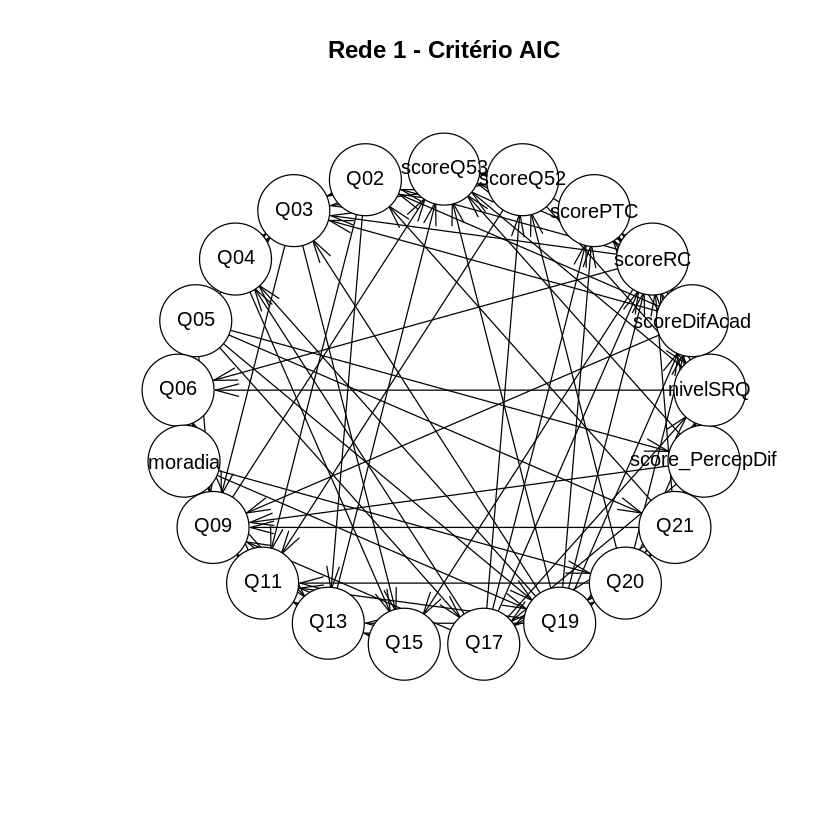

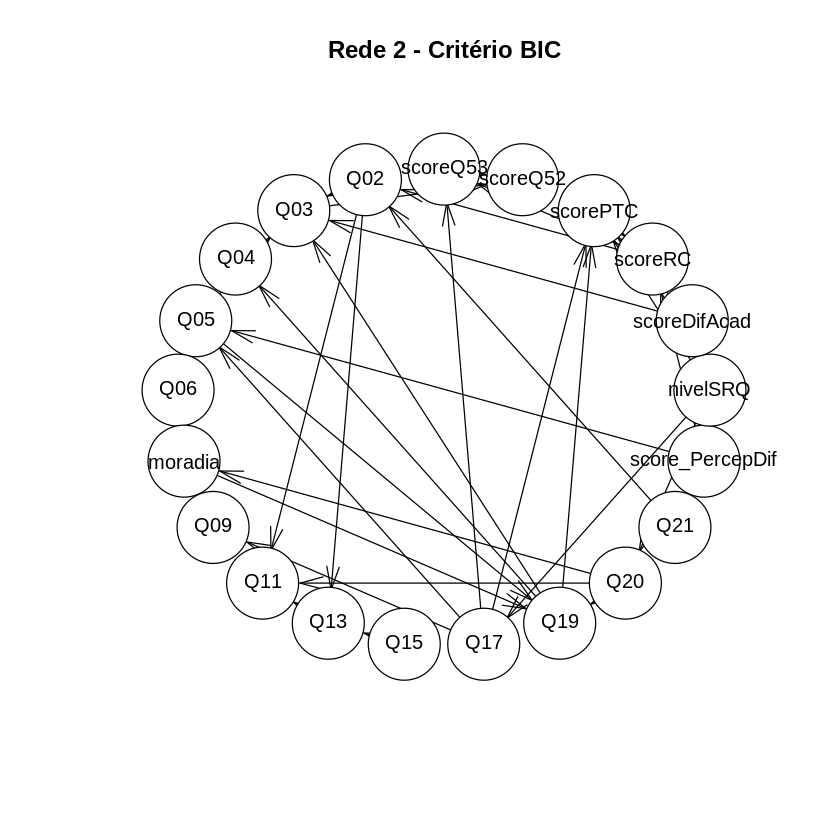

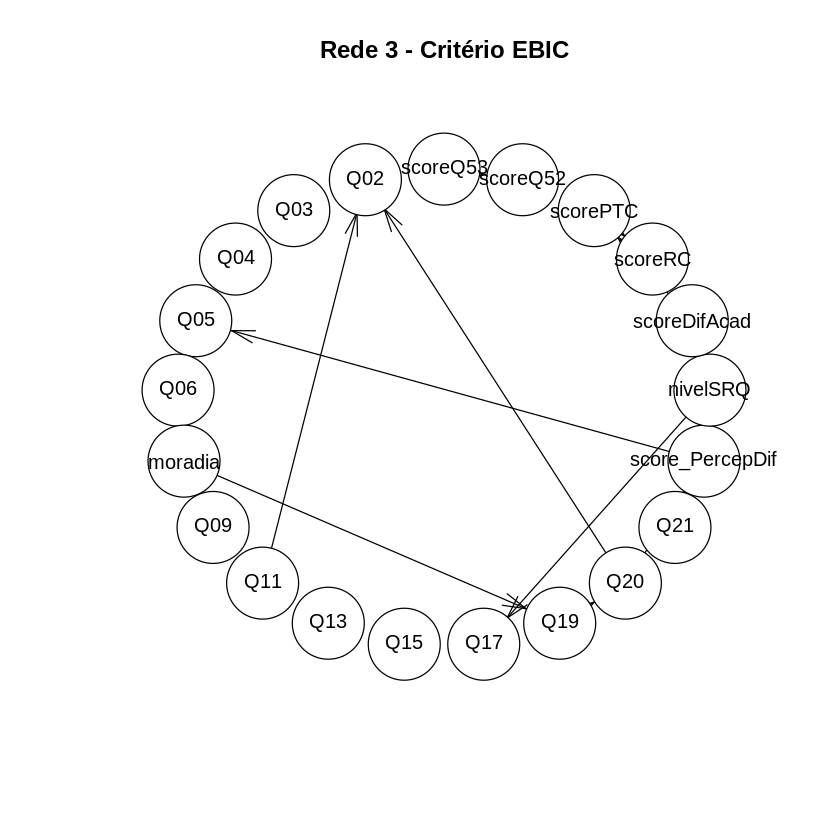

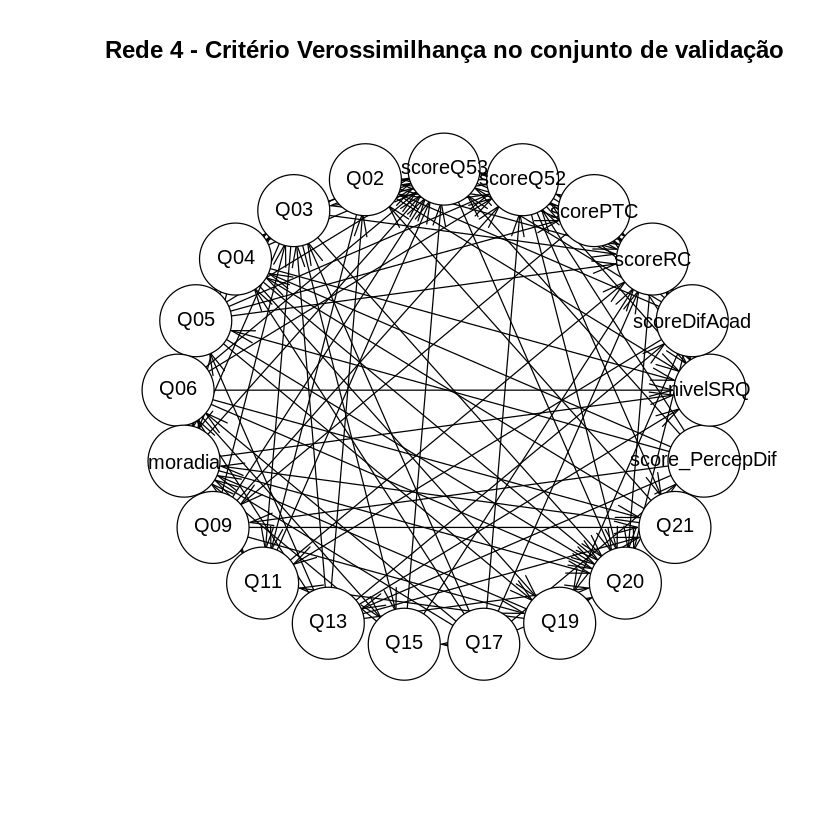

In [ ]:
set.seed(123)
train_idx <- createDataPartition(df_sem_2$nivelSRQ, p = 0.7, list = FALSE)
df_sem_2_treino <- df_sem_2[train_idx, ]
temp_set <- df_sem_2[-train_idx, ]

# Step 2: Split the temporary set into test (2/3 of 30% -> 20% of total) and validation (1/3 of 30% -> 10% of total) sets
test_idx <- createDataPartition(temp_set$nivelSRQ, p = 2/3, list = FALSE)
df_sem_2_teste <- temp_set[test_idx, ]
df_sem_2_val <- temp_set[-test_idx, ]

fit1 <- tabu(df_sem_2_treino, score = "aic-g", tabu=50, max.iter = Inf)
fit2 <- tabu(df_sem_2_treino, score = "bic-g", tabu=50, max.iter = Inf)
fit3 <- tabu(df_sem_2_treino, score = "ebic-g", tabu=50, max.iter = Inf)
fit4 <- tabu(df_sem_2_treino, score = "pred-loglik-g", newdata=df_sem_2_val, tabu=50, max.iter = Inf)

plot(fit1)
title("Rede 1 - Critério AIC")
plot(fit2)
title("Rede 2 - Critério BIC")
plot(fit3)
title("Rede 3 - Critério EBIC")
plot(fit4)
title("Rede 4 - Critério Verossimilhança no conjunto de validação")


In [ ]:
# Ajustar o modelo aos df_sem_2 de treino
fitted_model1 <- bn.fit(fit1, data = df_sem_2_treino)
fitted_model2 <- bn.fit(fit2, data = df_sem_2_treino)
fitted_model3 <- bn.fit(fit3, data = df_sem_2_treino)
fitted_model4 <- bn.fit(fit4, data = df_sem_2_treino)
# Fazer predições nos df_sem_2 de teste
predictions1 <- predict(fitted_model1, node = "nivelSRQ", data = df_sem_2_teste, method = "exact") %>% round %>% factor
predictions2 <- predict(fitted_model2, node = "nivelSRQ", data = df_sem_2_teste, method = "exact") %>% round %>% factor
predictions3 <- predict(fitted_model3, node = "nivelSRQ", data = df_sem_2_teste, method = "exact") %>% round %>% factor
predictions4 <- predict(fitted_model4, node = "nivelSRQ", data = df_sem_2_teste, method = "exact") %>% round %>% factor


actuals <-df_sem_2_teste$nivelSRQ %>% as.factor

# Load necessary library
library(caret)

# Calculate confusion matrix
confusion_mat1 <- confusionMatrix(predictions1, actuals)
confusion_mat2 <- confusionMatrix(predictions2, actuals)
confusion_mat3 <- confusionMatrix(predictions3, actuals)
confusion_mat4 <- confusionMatrix(predictions4, actuals)

print("MODELO 1")
confusion_mat1$table
print(confusion_mat1$overall)
print("MODELO 2")
confusion_mat2$table
print(confusion_mat2$overall)
print("MODELO 3")
confusion_mat3$table
print(confusion_mat3$overall)
print("MODELO 4")
confusion_mat4$table
print(confusion_mat4$overall)

[1] "MODELO 1"


          Reference
Prediction  1  2  3
         1 12  1  0
         2 12 27 10
         3  0  2  8

      Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  0.6527777778   0.4413407821   0.5313671687   0.7611872306   0.4166666667 
AccuracyPValue  McnemarPValue 
  0.0000452596            NaN 
[1] "MODELO 2"


          Reference
Prediction  1  2  3
         1 12  1  0
         2 12 26 10
         3  0  3  8

      Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  0.6388888889   0.4211502783   0.5171286481   0.7488371482   0.4166666667 
AccuracyPValue  McnemarPValue 
  0.0001185297            NaN 
[1] "MODELO 3"


          Reference
Prediction  1  2  3
         1 10  2  1
         2 14 25 12
         3  0  3  5

      Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
   0.555555556    0.279549719    0.433646445    0.672750784    0.416666667 
AccuracyPValue  McnemarPValue 
   0.012079438    0.001504847 
[1] "MODELO 4"


          Reference
Prediction  1  2  3
         1 11  3  0
         2 13 25 10
         3  0  2  8

      Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  0.6111111111   0.3754646840   0.4889369362   0.7238453142   0.4166666667 
AccuracyPValue  McnemarPValue 
  0.0006865085            NaN 


Podemos observar que os critérios AIC, BIC e EBIC selecionam cada vez menos conexões nos grafos, dependendo de quando cada critério pune a complexidade do modelo. Como o segundo modelo (usando o BIC) foi o melhor a partir da acurácia geral, focaremos nele no sentido da interpretação, levando em conta o fato que a estrutura aprendida pelo algoritmo é altamente sensível ao critério utilizado. Também usamos como critério a verossimilhança em um conjunto de validação (com separação 70% treino, 20% teste, 10% validação); é interessante notar que esse foi o grafo mais denso, conectando basicamente todos os nós.

Como o conjunto de dados é razoávelmente pequeno, e as acurácias todas caem no mesmo intervalo de confiança, não há muita razão estatística para preferir um modelo a outro; os selecionar através de um critério de informação leva a problemas de overfitting, já que as estruturas foram selecionadas para otimizar critérios diferentes. Se há algo que pode ser concluído a partir disso, é que as relações de condicionalidade nos dados é muito complexa para ser obtida de forma não-estruturada a partir de uma amostra tão pequena.

Por razão de parsimônia, então, selecionamos o modelo com menos arestas (o selecionado a partir do EBIC).

Podemos visualizar a força dessas conexões usando um gráfico das forças de cada, medindo as diferenças na verossimilhança a partir da remoção de cada aresta do grafo:

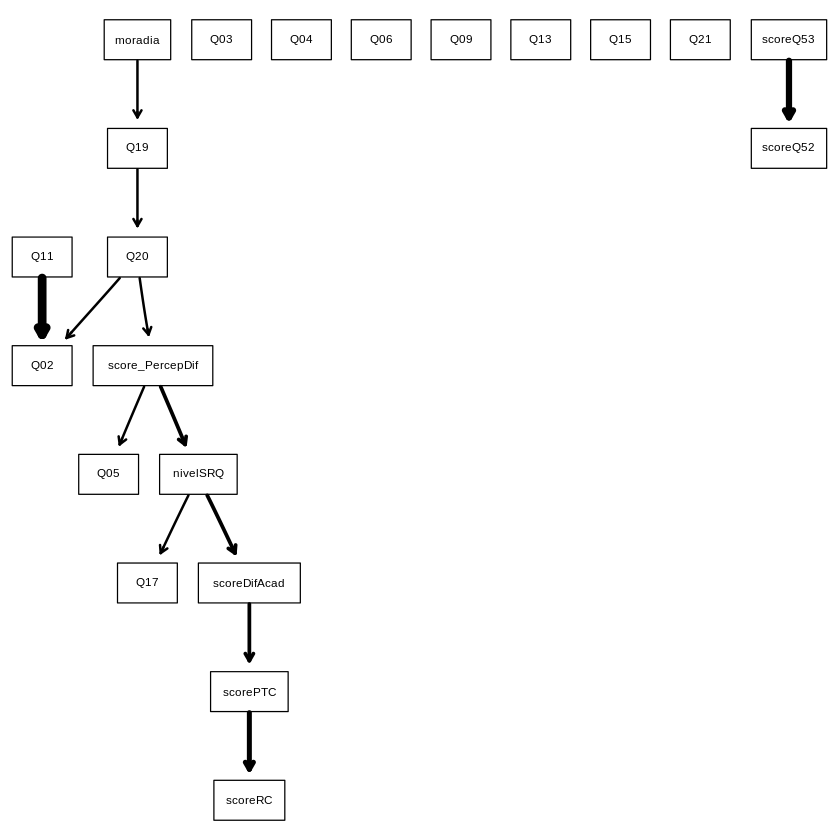

In [ ]:
#strength = arc.strength(fit1, df_sem_2_teste, criterion = "loglik-g")
#strength.plot(fit1, strength)
strength = arc.strength(fit3, df_sem_2_teste, criterion = "loglik-g")
strength.plot(fit3, strength)

A partir desse gráfico, observamos que as conexões mais fortes relacionadas ao nívelSRQ são as relacionadas com a percepção de dificuldades academicas e  segundamente sentimentos de pertencimento e com diagnósticos de saúde mental anteriores, com influências do vínculo com a universidade entrando de forma indireta.

Abaixo listamos as forças das conexões em ordem, corroborando o que é visto gráficamente.

In [ ]:
# prompt: for a dataframe "strs", get all rows such that either "from" has "nivelSRQ" or "to" has it, then sort it by "strength"
#strs <- boot.strength(df_sem_2, algorithm = "tabu", R = 200)
strength %>%
  filter(from == "nivelSRQ" | to == "nivelSRQ") %>%
  arrange(strength)


from,to,strength
<chr>,<chr>,<dbl>
nivelSRQ,scoreDifAcad,-11.029713
score_PercepDif,nivelSRQ,-8.719294
nivelSRQ,Q17,-2.798140


Entretanto, as estruturas desses grafos devem ser levadas com certo grau de ceticismo no sentido de gerar uma explicação "correta", já que um critério menos parsimonioso leva, essencialmente, a todos os nós estarem emaranhados em uma rede de dependência inextricável, o que nos parece como uma descrição razoável do que é observado.

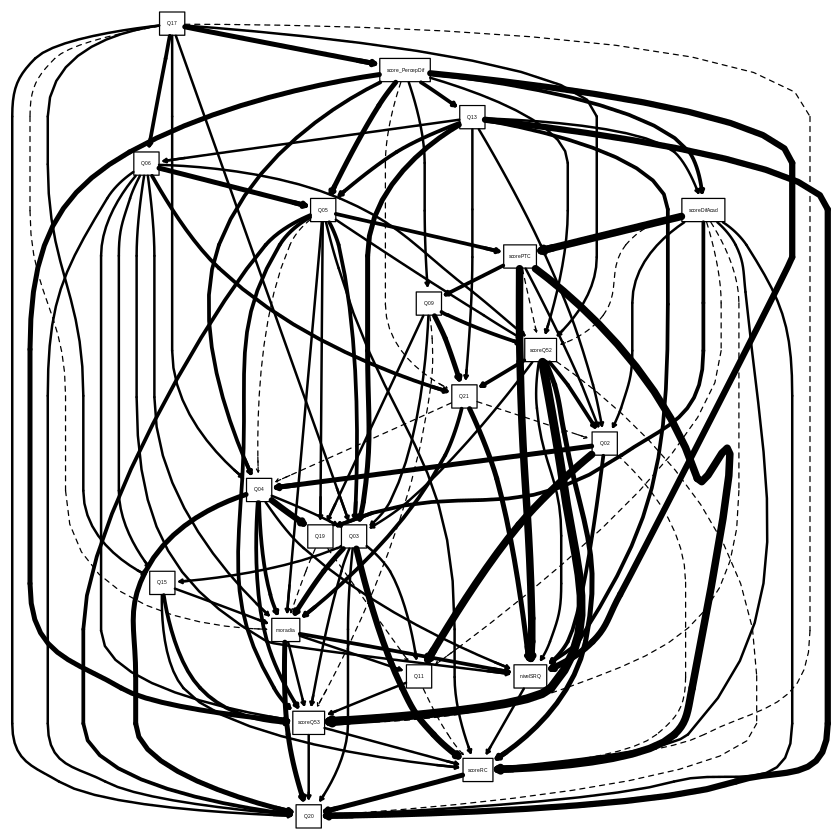

In [ ]:
strength = arc.strength(fit4, df_sem_2_teste, criterion = "loglik-g")
strength.plot(fit4, strength)

Em conclusão, obtemos um modelo com acurácia ~60% que leva em conta de forma direta apenas as dificuldades acadêmicas e diagnósticos anteriores, com os outros efeitos agindo de forma indireta.

## Análise de caminhos (TENTATIVA)

In [ ]:
#df_sem_22_treino <- df_sem_22[train_idx, ]
#df_sem_22_teste <- df_sem_22[test_idx, ]
#df_sem_22_val <- df_sem_22[val_idx, ]

#fit11 <- tabu(df_sem_22_treino, score = "aic-cg", tabu=50, max.iter = Inf)
#fit22 <- tabu(df_sem_22_treino, score = "bic-cg", tabu=50, max.iter = Inf)
#fit33 <- tabu(df_sem_22_treino, score = "ebic-cg", tabu=50, max.iter = Inf)

#plot(fit11)
#title("Rede 1 - Critério AIC")
#plot(fit22)
#title("Rede 2 - Critério BIC")
#plot(fit33)
#title("Rede 3 - Critério EBIC")


In [ ]:
#AQUI TENTATIVA DE FAZER SEM O ARREDONDAMENTO - ERROS ESTRANHOS OCORREM
#fitted_model11 <- bn.fit(fit11, data = df_sem_22_treino)
#fitted_model22 <- bn.fit(fit22, data = df_sem_2_treino)
#fitted_model33 <- bn.fit(fit33, data = df_sem_2_treino)
#fitted_model22 <- bn.fit(fit22, data = df_sem_2_treino)



# Fazer predições nos df_sem_2 de teste
#predictions11 <- predict(fitted_model11, node = "nivelSRQ", data = df_sem_2_teste, method = "exact") %>% round %>% factor
#predictions22 <- predict(fitted_model22, node = "nivelSRQ", data = df_sem_2_teste, method = "exact") %>% round %>% factor
#predictions33 <- predict(fitted_model33, node = "nivelSRQ", data = df_sem_2_teste, method = "exact") %>% round %>% factor
#predictions44 <- predict(fitted_model44, node = "nivelSRQ", data = df_sem_2_teste, method = "exact") %>% round %>% factor



#confusion_mat11 <- confusionMatrix(predictions11, actuals)
#confusion_mat11
#confusion_mat22 <- confusionMatrix(predictions22, actuals)
#confusion_mat22
#confusion_mat33 <- confusionMatrix(predictions33, actuals)
#confusion_mat33
#confusion_mat22 <- confusionMatrix(predictions22, actuals)
#confusion_mat22


In [ ]:
model <- '
# Fatores latentes
Permanencia =~ q20 #Permanência estudantil

Academico =~ score_dif_acad + score_percep_dif # Experiência acadêmica

Pertencimento =~ 1+ score_rc
            + score_ptc
           + score_q52
           + score_q53

# Relações entre fatores latentes e variáveis observadas
Permanencia ~ moradia_sim + q19sim
 + q0220_a_25 + q02mais_que_25


Academico ~ q09iau + q09icmc + q09ifsc + q09iqsc
            + q112020 + q112021 + q112022 + q112023


Pertencimento ~ q15sim + q17sim
           + q13nao_mas_ja_tive_emprego_formal_ou_informalmente_e_tenho_experiencia_profissional
           + q13sim_informalmente
           + q13sim_formal_com_registro_ou_contrato
           + q13outros

Permanencia ~~ Academico
Permanencia ~~ Pertencimento
Pertencimento ~~ Academico

# Relações entre fatores demográficos e nivelSRQ
nivel_srq ~ Permanencia + Academico + Pertencimento

'


#fit <- sem(model, data=df_sem, estimator="WLSMV")
#summary(fit, standardized=TRUE)
#IGNORE - TENTATIVA DE ANÁLISE DE CAMINHOS QUE NÃO DEU MUITO CERTO

# Modelo logit


Nesta seção, está foi ajustado um modelo categórico. Optamos por remover o scoreQ53 devido à sua alta correlação com o scoreQ52 e o Q10 (Curso de graduação), devido ao grande número de níveis, assim como devido à sua forte relação com o Q09: Vínculo com a universidade.

Consideramos modelar a variável nível SQR, que é uma variável categórica com três níveis. Um modelo de regressão possível é um modelo categórico, no qual são modelados dois parâmetros: a probabilidade de uma observação ser do nível 2 e a probabilidade de uma observação ser do nível 3. O nível 1 é tomado como referência para garantir identificabilidade. Por fim, prioris fracamante informatias são consideras, tomando como referência [2]

## Divisão treino e teste

Nessa seção, realizamos a divisão de treino e teste (70/30). Adicionalmente, recodificamos alguns níveis da variável Q09, pois foi observado que há uma separação completa em pelo menos dois de seus níveis, o que dificulta a convergência dos modelos. Para garantir legibilidade do código e evitar inconsistências, foi criada uma função responsável pelo processamento das variáveis categóricas.

Por fim, uma semente é utilizada, para que tudo seja reprodutível

In [ ]:
set.seed(13)

In [ ]:

proporcao_treino <- 0.7

indices <- createDataPartition(df$nivelSRQ, p = proporcao_treino, list = FALSE)

# Criando conjuntos de treino e teste com base nos índices
dados_treino <- df[indices, ]
dados_teste <- df[-indices, ]


In [ ]:
preProcValues <- preProcess(dados_treino, method = c("center", "scale"))

In [ ]:
trainTransformed <- predict(preProcValues, dados_treino)
testTransformed <- predict(preProcValues, dados_teste)


In [ ]:
table(trainTransformed$nivelSRQ , trainTransformed$Q09)

         
          EESC Eng Comp IAU ICMC IFSC IQSC Licenciatura
  Nível 0    9        3  29   20   12    2            0
  Nível 1   30        2  33   17   24    5            6
  Nível 2    8        0  12   14   22    3            4

Note que, nesta categoria, há uma separação total em dois níveis: Engenharia de Computação e Licenciatura, além de poucas observações para IQSCs. Podemos agrupá-las sem perder o significado utilizando a seguinte relação  'Ciências da Natureza' = ("IFSC", "IQSC", "Licenciatura"), "Engenharias" = ('EESC', 'Eng Comp')."

In [ ]:
# pela legibilidade, criamos essa  função que faz todo pre processamento necessario

codificar_niveis = function(data){
  data =  data %>% mutate_if(is.character, as.factor)
  levels(data$Q13) = c('0','1','2','3','4') # codifica nivel com nomes muito grandes
  levels(data$nivelSRQ) = c("1","2","3") # remapeia as categorias
  data['Q05'] = relevel(data$Q05 , 'Heterossexual')  # modifica cat ref
  data['Q02'] = relevel(data$Q02 , 'Até 19')  # modifica cat ref
  data['Q04'] = relevel(data$Q04 , 'Branca') # modifica cat ref
  data['Q09']  = fct_collapse(data$Q09 , 'Ciências da natureza' = c("IFSC","IQSC","Licenciatura"), "Engenharias" = c('EESC','Eng Comp' )) # Modifica categoria com muita separação total
  data['Q20'] <- as.factor(data$Q20)
  return(data)

}

In [ ]:
trainTransformed <- codificar_niveis(trainTransformed)
testTransformed <- codificar_niveis(testTransformed)


In [ ]:
trainTransformed$nivelSRQ

[1] 1 2 3 2 3 3 3 2 1 2 3 3 2 2 2 1 3 3 3 3 1 2 1 1 1 2 3 3 1 2 2 3 2 1 2 1 2
 [38] 2 1 1 3 2 2 3 1 2 1 3 2 2 3 1 1 3 2 2 1 3 3 2 2 3 1 3 3 3 3 3 3 3 2 2 2 2
 [75] 1 1 1 2 2 1 2 2 3 2 3 3 3 2 3 1 2 2 2 2 2 3 3 2 2 2 1 2 1 2 2 2 2 2 1 2 2
[112] 2 3 2 3 2 2 3 1 2 2 2 3 2 3 2 3 3 3 1 2 2 1 2 3 2 1 3 2 2 1 1 2 1 2 2 1 1
[149] 3 1 3 2 1 2 1 1 2 1 2 3 2 1 2 2 1 1 1 2 2 2 2 2 1 2 1 1 1 1 2 3 3 1 2 2 1
[186] 1 1 1 2 1 1 1 2 3 2 2 2 2 3 2 1 1 1 1 2 2 2 3 1 2 2 3 1 1 1 2 2 2 2 1 2 2
[223] 2 1 1 2 3 3 2 2 3 1 1 2 3 2 1 2 1 3 2 2 2 2 2 2 2 2 1 1 1 3 3 3 3
Levels: 1 2 3

## Modelo completo

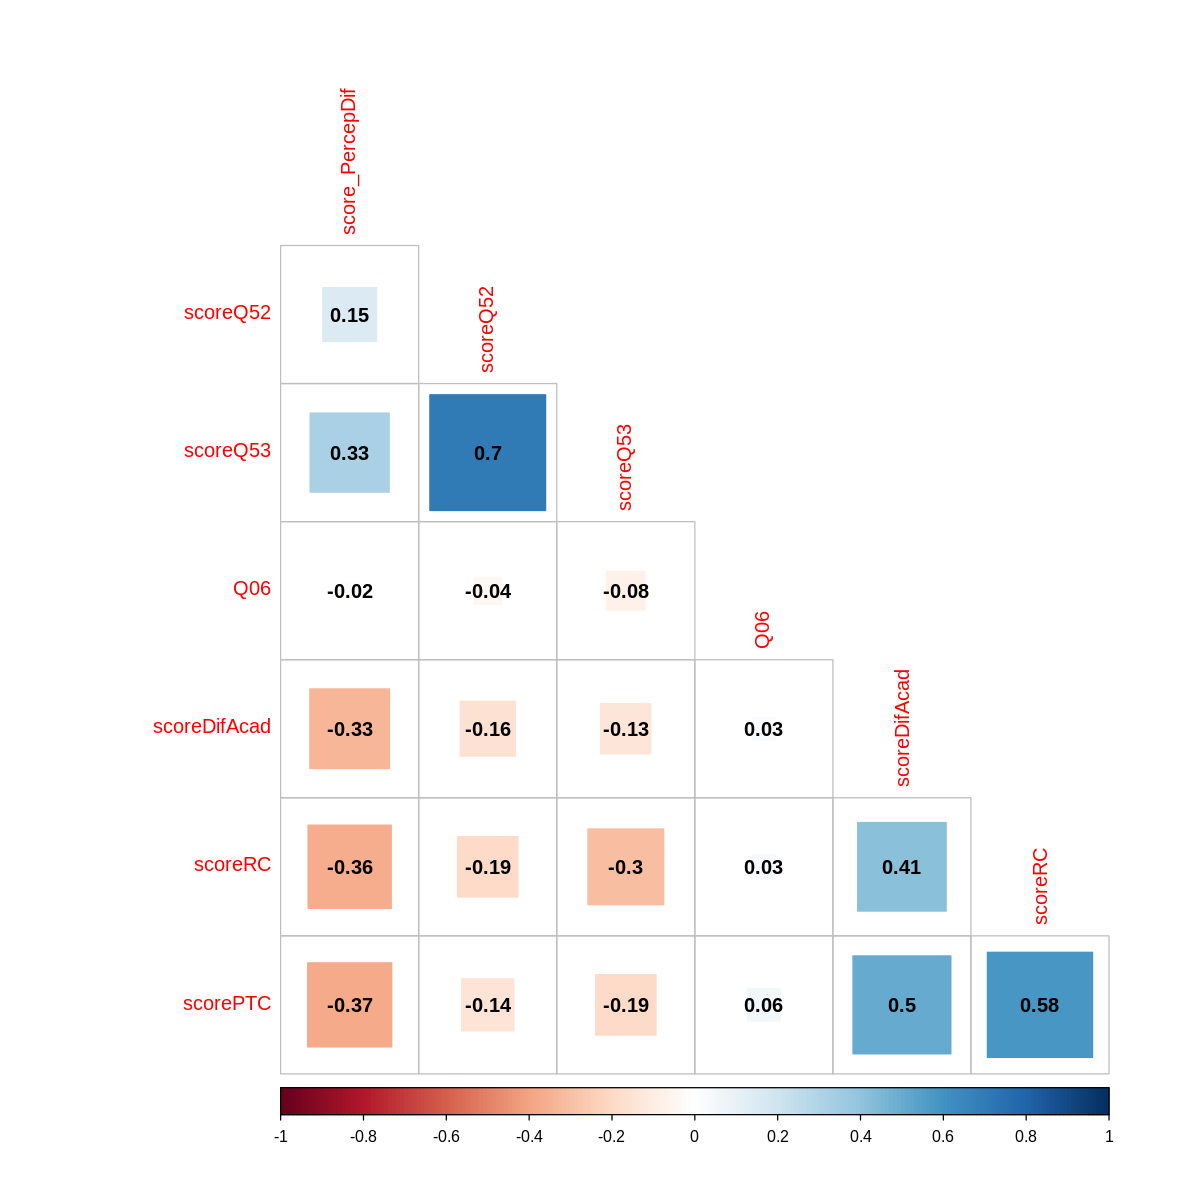

In [ ]:
M <- trainTransformed %>% select_if(is.numeric) %>% cor(method  = 'spearman')
options(repr.plot.width=10, repr.plot.height=10)
corrplot(M, order = 'hclust' , type  = 'lower', method = 'square', addCoef.col = 'black', diag = F)

**optamos por não usar q scoreQ53 devido a correlaçaõ com scoreQ52**

In [ ]:
# Formula sem o scoreq52
formula <- bf(nivelSRQ  ~  Q02 + Q03 + Q04 + Q05 + moradia + Q09  + Q11+ Q13 + Q15 + Q17 + Q19 + Q21  + Q06 + Q20 + score_PercepDif + scoreDifAcad + scoreRC + scorePTC + scoreQ52 )


In [ ]:
# a piori padrão do brms para o modelo categorico
prior_default = default_prior(formula, data  = trainTransformed, family = categorical(link = "logit"))  %>% as.data.frame()

In [ ]:
# modificamos as prioris conforme a ref [2]

coef_mu1_b = prior_default %>% filter(dpar == 'mu2' & class =='b')  %>% select(coef)  %>% pull()
coef_mu2_b = prior_default %>% filter(dpar == 'mu3' & class =='b')  %>% select(coef)  %>% pull()
mod_prior = c(
  prior_string("cauchy(0, 10)", class = "Intercept", dpar = c("mu2", "mu3")),
   prior_string("cauchy(0, 2.5)", class = "b", coef= coef_mu1_b,  dpar = "mu2"),
   prior_string("cauchy(0, 2.5)", class = "b", coef= coef_mu2_b,  dpar = "mu3")
)

In [ ]:
# Ajusta o modelo utilizando as prioris de Gelman
modelo_cauchy_prior <- brm(formula,
                          cores = n_cores,
                          family = categorical(link = "logit"),
                          data = trainTransformed,
                          chains = 4,
                          iter = 3000,
                          prior = mod_prior,
                          warmup = 1000,
                          seed = 13)


Warning message:
“The global prior 'cauchy(0, 2.5)' of class 'b' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Warning message:
“The global prior 'cauchy(0, 2.5)' of class 'b' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Compiling Stan program...

Start sampling



## modelo reduzido

Nesta seção, buscamos um modelo reduzido que seja mais simples, mas que não perca a capacidade de ajuste aos dados. Como as variáveis categóricas contribuem significativamente para a dimensão da matriz do modelo, focamos inicialmente na seleção delas.

In [ ]:
trainTransformed %>%
  summarise_if(is.factor, ~nlevels(as.factor(.)))

Q02,Q03,Q04,Q05,moradia,Q09,Q11,Q13,Q15,Q17,Q19,Q20,Q21,nivelSRQ
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,3,3,4,2,4,5,5,2,2,2,5,2,3


Veja que as variáveis categóricas resultam em 31 colunas na matriz do modelo.

In [ ]:
cols = trainTransformed %>%  select(-c(nivelSRQ))%>% select(where(is.factor)) %>%names()

In [ ]:
cols

[1] "Q02"     "Q03"     "Q04"     "Q05"     "moradia" "Q09"     "Q11"    
 [8] "Q13"     "Q15"     "Q17"     "Q19"     "Q20"     "Q21"

In [ ]:
get_cramver <- function(var) {
  tabela <- table(trainTransformed$nivelSRQ, trainTransformed[[var]])
  return(cramer_v(tabela))
}


In [ ]:
cramer_cols <- sapply(cols, get_cramver)

Warning message in stats::chisq.test(x, y, correct = correct, ...):
“Chi-squared approximation may be incorrect”
Warning message in stats::chisq.test(x, y, correct = correct, ...):
“Chi-squared approximation may be incorrect”
Warning message in stats::chisq.test(x, y, correct = correct, ...):
“Chi-squared approximation may be incorrect”
Warning message in stats::chisq.test(x, y, correct = correct, ...):
“Chi-squared approximation may be incorrect”
Warning message in stats::chisq.test(x, y, correct = correct, ...):
“Chi-squared approximation may be incorrect”


Para selecionar as variáveis categóricas, adotamos o seguinte procedimento: selecionar aproximadamente 25%, 50%, e 75% das variáveis com base na correlação medida pelo coeficiente de Cramer V com a variável resposta.

In [ ]:
cramer_cols %>% as.data.frame() %>% arrange(desc(.))

,.
,<dbl>
Q17,0.33547144
Q20,0.27817824
Q05,0.21103205
Q09,0.20719412
Q19,0.18688397
Q13,0.14677801
Q11,0.13657934
Q02,0.11641702
Q21,0.11602750


**Selecionar 25% das variáveis categóricas**
- Q17: Possui diagnósticos em saúde mental
- Q20: Vínculo com a universidade
- Q05: Orientação sexual


**Selecionar 50% das variáveis categóricas**
- Q17: Possui diagnósticos em saúde mental
- Q20 Vínculo com a universidad
- Q05: Orientação sexual
- Q09: Recebe auxílio permanência (PAPFE)
- Q19: Exerce atividade remunerada além do estudo
- Q13: Ano de ingresso

**Selecionar 75%  das variáveis categórica**


- Q17: Possui diagnósticos em saúde mental
- Q20 Vínculo com a universidad
- Q05: Orientação sexual
- Q09: Recebe auxílio permanência (PAPFE)
- Q19: Exerce atividade remunerada além do estudo
- Q13: Ano de ingresso
- Q11: Ano de ingresso
- Q02: Idade
- Q21: Conhece o Apoia USP ou GAPsi


In [ ]:
# modificamos as prioris conforme a ref [2]
formula_modelo_reduzido_25 <-  bf(nivelSRQ  ~  Q17 + Q20 + Q05 + scoreDifAcad  + score_PercepDif + scoreRC + scorePTC + scoreQ52 + Q06)

prior_default_reduzido_25 = default_prior(formula_modelo_reduzido_25, data  = trainTransformed, family = categorical(link = "logit"))  %>% as.data.frame()
coef_mu1_b_reduzido_25 = prior_default_reduzido_25 %>% filter(dpar == 'mu2' & class =='b')  %>% select(coef)  %>% pull()
coef_mu2_b_reduzido_25 = prior_default_reduzido_25 %>% filter(dpar == 'mu3' & class =='b')  %>% select(coef)  %>% pull()
mod_prior_reduzido_25 = c(
  prior_string("cauchy(0, 10)", class = "Intercept", dpar = c("mu2", "mu3")),
   prior_string("cauchy(0, 2.5)", class = "b", coef= coef_mu1_b_reduzido_25,  dpar = "mu2"),
   prior_string("cauchy(0, 2.5)", class = "b", coef= coef_mu2_b_reduzido_25,  dpar = "mu3")
)

In [ ]:
# Ajusta o modelo utilizando as prioris de Gelman
modelo_cauchy_prior_reduzido_25 <- brm(formula_modelo_reduzido_25,
                                      cores = n_cores,
                                      family = categorical(link = "logit"),
                                      data = trainTransformed,
                                      chains = 4,
                                      iter = 3000,
                                      prior = mod_prior_reduzido_25,
                                      warmup = 1000,
                                      seed = 13)


Warning message:
“The global prior 'cauchy(0, 2.5)' of class 'b' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Warning message:
“The global prior 'cauchy(0, 2.5)' of class 'b' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Compiling Stan program...

Start sampling



In [ ]:
# modificamos as prioris conforme a ref [2]
formula_modelo_reduzido_50 <-  bf(nivelSRQ  ~  Q17 + Q20 + Q05 + Q09 + Q19  + Q13+  scoreDifAcad+ score_PercepDif + scoreRC + scorePTC + scoreQ52  + Q06)

prior_default_reduzido_50 = default_prior(formula_modelo_reduzido_50, data  = trainTransformed, family = categorical(link = "logit"))  %>% as.data.frame()
coef_mu1_b_reduzido_50 = prior_default_reduzido_50 %>% filter(dpar == 'mu2' & class =='b')  %>% select(coef)  %>% pull()
coef_mu2_b_reduzido_50 = prior_default_reduzido_50 %>% filter(dpar == 'mu3' & class =='b')  %>% select(coef)  %>% pull()
mod_prior_reduzido_50 = c(
  prior_string("cauchy(0, 10)", class = "Intercept", dpar = c("mu2", "mu3")),
   prior_string("cauchy(0, 2.5)", class = "b", coef= coef_mu1_b_reduzido_50,  dpar = "mu2"),
   prior_string("cauchy(0, 2.5)", class = "b", coef= coef_mu2_b_reduzido_50,  dpar = "mu3")
)

In [ ]:
# Ajusta o modelo utilizando as prioris de Gelman
modelo_cauchy_prior_reduzido_50 <- brm(formula_modelo_reduzido_50,
                                      cores = n_cores,
                                      family = categorical(link = "logit"),
                                      data = trainTransformed,
                                      chains = 4,
                                      iter = 3000,
                                      prior = mod_prior_reduzido_50,
                                      warmup = 1000,
                                      seed = 13)


Warning message:
“The global prior 'cauchy(0, 2.5)' of class 'b' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Warning message:
“The global prior 'cauchy(0, 2.5)' of class 'b' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Compiling Stan program...

Start sampling



In [ ]:
# modificamos as prioris conforme a ref [2]
formula_modelo_reduzido_75 <-  bf(nivelSRQ  ~  Q17 + Q20 + Q05 + Q09 + Q19  + Q13+ Q11 + Q02 + Q21+  scoreDifAcad + score_PercepDif+ scoreRC + scorePTC + scoreQ52  + Q06)

prior_default_reduzido_75 = default_prior(formula_modelo_reduzido_75, data  = trainTransformed, family = categorical(link = "logit"))  %>% as.data.frame()
coef_mu1_b_reduzido_75 = prior_default_reduzido_75 %>% filter(dpar == 'mu2' & class =='b')  %>% select(coef)  %>% pull()
coef_mu2_b_reduzido_75 = prior_default_reduzido_75 %>% filter(dpar == 'mu3' & class =='b')  %>% select(coef)  %>% pull()
mod_prior_reduzido_75 = c(
  prior_string("cauchy(0, 10)", class = "Intercept", dpar = c("mu2", "mu3")),
   prior_string("cauchy(0, 2.5)", class = "b", coef= coef_mu1_b_reduzido_75,  dpar = "mu2"),
   prior_string("cauchy(0, 2.5)", class = "b", coef= coef_mu2_b_reduzido_75,  dpar = "mu3")
)

In [ ]:
# Ajusta o modelo utilizando as prioris de Gelman
modelo_cauchy_prior_reduzido_75 <- brm(formula_modelo_reduzido_75,
                                      cores = n_cores,
                                      family = categorical(link = "logit"),
                                      data = trainTransformed,
                                      chains = 4,
                                      iter = 3000,
                                      prior = mod_prior_reduzido_75,
                                      warmup = 1000,
                                      seed = 13)


Warning message:
“The global prior 'cauchy(0, 2.5)' of class 'b' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Warning message:
“The global prior 'cauchy(0, 2.5)' of class 'b' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Compiling Stan program...

Start sampling



In [ ]:
modelo_cauchy_prior  <- add_criterion(modelo_cauchy_prior, "loo",moment_match = TRUE)
modelo_cauchy_prior_reduzido_75  <- add_criterion(modelo_cauchy_prior_reduzido_75, "loo",moment_match = TRUE)
modelo_cauchy_prior_reduzido_50  <- add_criterion(modelo_cauchy_prior_reduzido_50, "loo",moment_match = TRUE)
modelo_cauchy_prior_reduzido_25  <- add_criterion(modelo_cauchy_prior_reduzido_25, "loo",moment_match = TRUE)

In [ ]:
loo_compare(modelo_cauchy_prior,modelo_cauchy_prior_reduzido_75, modelo_cauchy_prior_reduzido_50, modelo_cauchy_prior_reduzido_25)

,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
modelo_cauchy_prior_reduzido_25,0.00000,0.000000,-201.7065,11.60816,29.14928,2.223552,403.4130,23.21633
modelo_cauchy_prior_reduzido_50,-7.02150,5.362139,-208.7280,13.05737,47.71655,3.604983,417.4560,26.11473
modelo_cauchy_prior_reduzido_75,-13.58741,7.839148,-215.2939,13.96586,65.25898,4.982158,430.5878,27.93172
modelo_cauchy_prior,-21.91024,9.135754,-223.6167,15.33814,81.26411,6.377574,447.2335,30.67627


**Utilizando o critério loo, o modelo reduzido em 25% é o preferido.** Portanto, adotaremos as seguintes variáveis categóricas.


- Q17: Possui diagnósticos em saúde mental
- Q09: Vínculo com a universidade
- Q05: Orientação sexual


## Splines

Para as variáveis numéricas, procederemos com a seleção das variáveis e, posteriormente, faremos uma proposta de modelo utilizando splines.

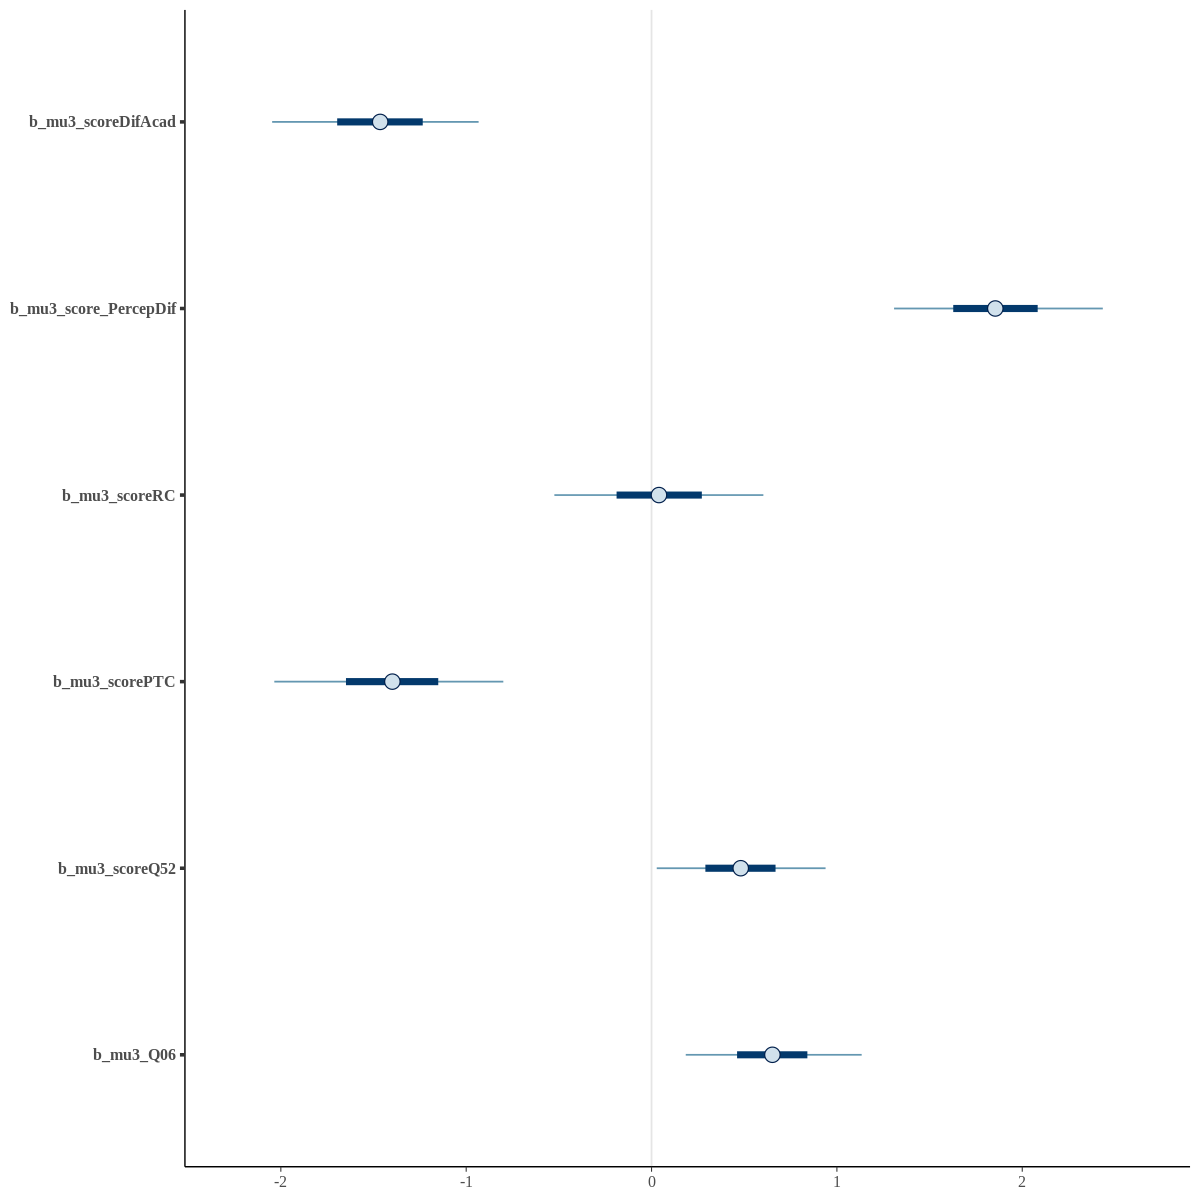

In [ ]:
mcmc_plot(modelo_cauchy_prior_reduzido_25,, var = c('b_mu3_scoreDifAcad' , 'b_mu3_score_PercepDif' , 'b_mu3_scoreRC' , 'b_mu3_scorePTC' , 'b_mu3_scoreQ52' , 'b_mu3_Q06'))

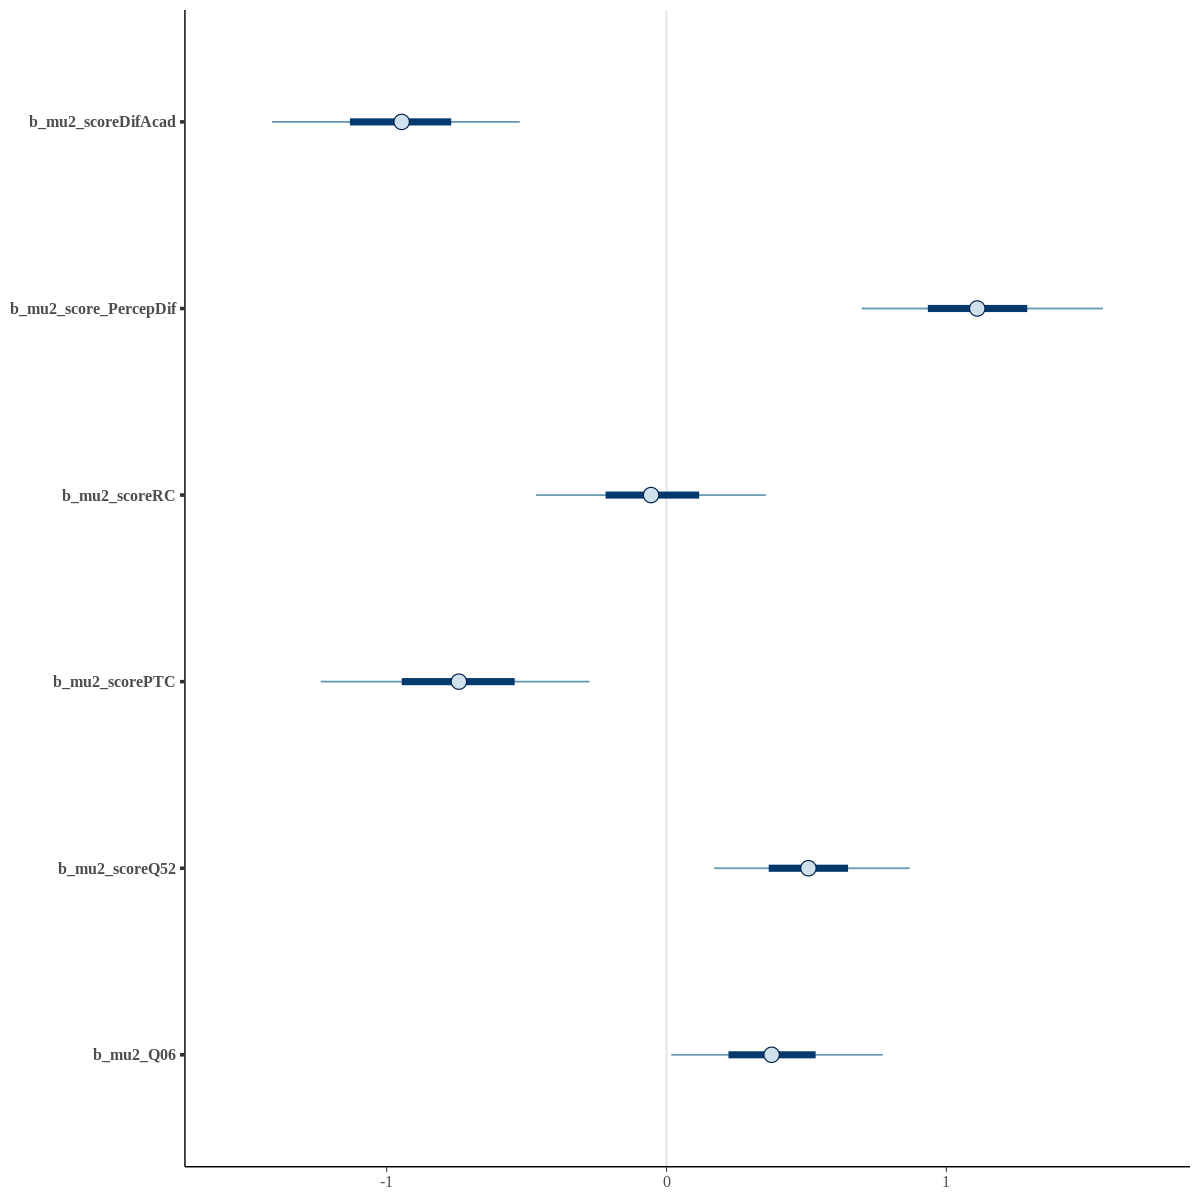

In [ ]:
mcmc_plot(modelo_cauchy_prior_reduzido_25,, var = c('b_mu2_scoreDifAcad' , 'b_mu2_score_PercepDif' , 'b_mu2_scoreRC' , 'b_mu2_scorePTC' , 'b_mu2_scoreQ52' , 'b_mu2_Q06'))

Como o scoreRc parece não ter muito efeito, vamos testar um modelo sem essa variável.

In [ ]:
# modificamos as prioris conforme a ref [2]
formula_modelo_reduzido_25_2 <-  bf(nivelSRQ  ~  Q17 + Q20 + Q05  + scoreDifAcad  + score_PercepDif  + scorePTC + scoreQ52 + Q06)

prior_default_reduzido_25_2 = default_prior(formula_modelo_reduzido_25_2, data  = trainTransformed, family = categorical(link = "logit"))  %>% as.data.frame()
coef_mu1_b_reduzido_25_2 = prior_default_reduzido_25_2 %>% filter(dpar == 'mu2' & class =='b')  %>% select(coef)  %>% pull()
coef_mu2_b_reduzido_25_2 = prior_default_reduzido_25_2 %>% filter(dpar == 'mu3' & class =='b')  %>% select(coef)  %>% pull()
mod_prior_reduzido_25_2 = c(
  prior_string("cauchy(0, 10)", class = "Intercept", dpar = c("mu2", "mu3")),
   prior_string("cauchy(0, 2.5)", class = "b", coef= coef_mu1_b_reduzido_25_2,  dpar = "mu2"),
   prior_string("cauchy(0, 2.5)", class = "b", coef= coef_mu2_b_reduzido_25_2,  dpar = "mu3")
)

In [ ]:
# Ajusta o modelo utilizando as prioris de Gelman
modelo_cauchy_prior_reduzido_25_2 <- brm(formula_modelo_reduzido_25_2,
                                      cores = n_cores,
                                      family = categorical(link = "logit"),
                                      data = trainTransformed,
                                      chains = 4,
                                      iter = 3000,
                                      prior = mod_prior_reduzido_25_2,
                                      warmup = 1000,
                                      seed = 13)


Warning message:
“The global prior 'cauchy(0, 2.5)' of class 'b' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Warning message:
“The global prior 'cauchy(0, 2.5)' of class 'b' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Compiling Stan program...

Start sampling



In [ ]:
modelo_cauchy_prior_reduzido_25_2  <- add_criterion(modelo_cauchy_prior_reduzido_25_2, "loo",moment_match = TRUE)

In [ ]:
loo_compare(modelo_cauchy_prior,modelo_cauchy_prior_reduzido_75, modelo_cauchy_prior_reduzido_50, modelo_cauchy_prior_reduzido_25,modelo_cauchy_prior_reduzido_25_2)

,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
modelo_cauchy_prior_reduzido_25_2,0.000000,0.0000000,-199.4298,11.45847,26.73566,1.994309,398.8596,22.91694
modelo_cauchy_prior_reduzido_25,-2.276715,0.5527889,-201.7065,11.60816,29.14928,2.223552,403.4130,23.21633
modelo_cauchy_prior_reduzido_50,-9.298216,5.4178594,-208.7280,13.05737,47.71655,3.604983,417.4560,26.11473
modelo_cauchy_prior_reduzido_75,-15.864129,7.8992189,-215.2939,13.96586,65.25898,4.982158,430.5878,27.93172
modelo_cauchy_prior,-24.186959,9.2451657,-223.6167,15.33814,81.26411,6.377574,447.2335,30.67627


Utilizando o critério loo, o modelo sem ScoreRc foi preferido. Portanto, vamos adotá-lo.

### splines

Um próximo passo é utilizar splines nas variáveis numéricas em que a suposição de linearidade é violada. Um recurso gráfico utilizado para verificar essa suposição é plotar o valor da variável no eixo y contra o valor da predição na escala logit e ajustar uma função via loesses; se a curva for muito sinuosa, há indicativos de violação dessa suposição

In [ ]:
logit_link <- make.link("logit")$linkfun

In [ ]:
#
predict_logit <-predict(modelo_cauchy_prior_reduzido_25_2   , ntrys = 1000)


In [ ]:
numeric_data = trainTransformed %>% select_if(is.numeric)  %>% select(-c(scoreQ53))

In [ ]:
predict_logit <-  predict_logit %>% as.data.frame()
predict_logit <- predict_logit %>% mutate_all(logit_link)
predict_logit = predict_logit %>% select(-c('P(Y = 1)'))


In [ ]:
numeric_data <- numeric_data %>% mutate(predict_logit )

In [ ]:

head(numeric_data)

Q06,score_PercepDif,scoreDifAcad,scoreRC,scorePTC,scoreQ52,P(Y = 2),P(Y = 3)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.2202609,-1.07324831,1.5472469,0.1734617,1.3846318,0.1137705,-2.20558583,-7.8882095
-0.4584793,0.09798558,-1.1311466,-0.5477242,-1.0960318,0.3496360,0.38571189,-0.5257872
-0.4008459,2.05004206,-0.9251163,-0.5477242,-0.2691439,0.5855016,-0.18502606,0.1618524
4.4634211,0.29319123,1.9593075,0.8946476,0.5577440,-1.3014230,0.17544868,-2.5141088
-0.6698022,-0.68283701,0.1050350,-1.0285148,0.5577440,1.0572328,-0.09406931,-2.0667079
-0.5852730,1.26921947,-1.9552676,-0.5477242,-1.0960318,0.1137705,-1.75136591,1.7464145


In [ ]:
library(ggpubr)

In [ ]:
options(repr.plot.width=15, repr.plot.height=7.5)

Para não adcionar muita complexidade ao modelo, foi considerado um spline nas variáveis com maior efeito

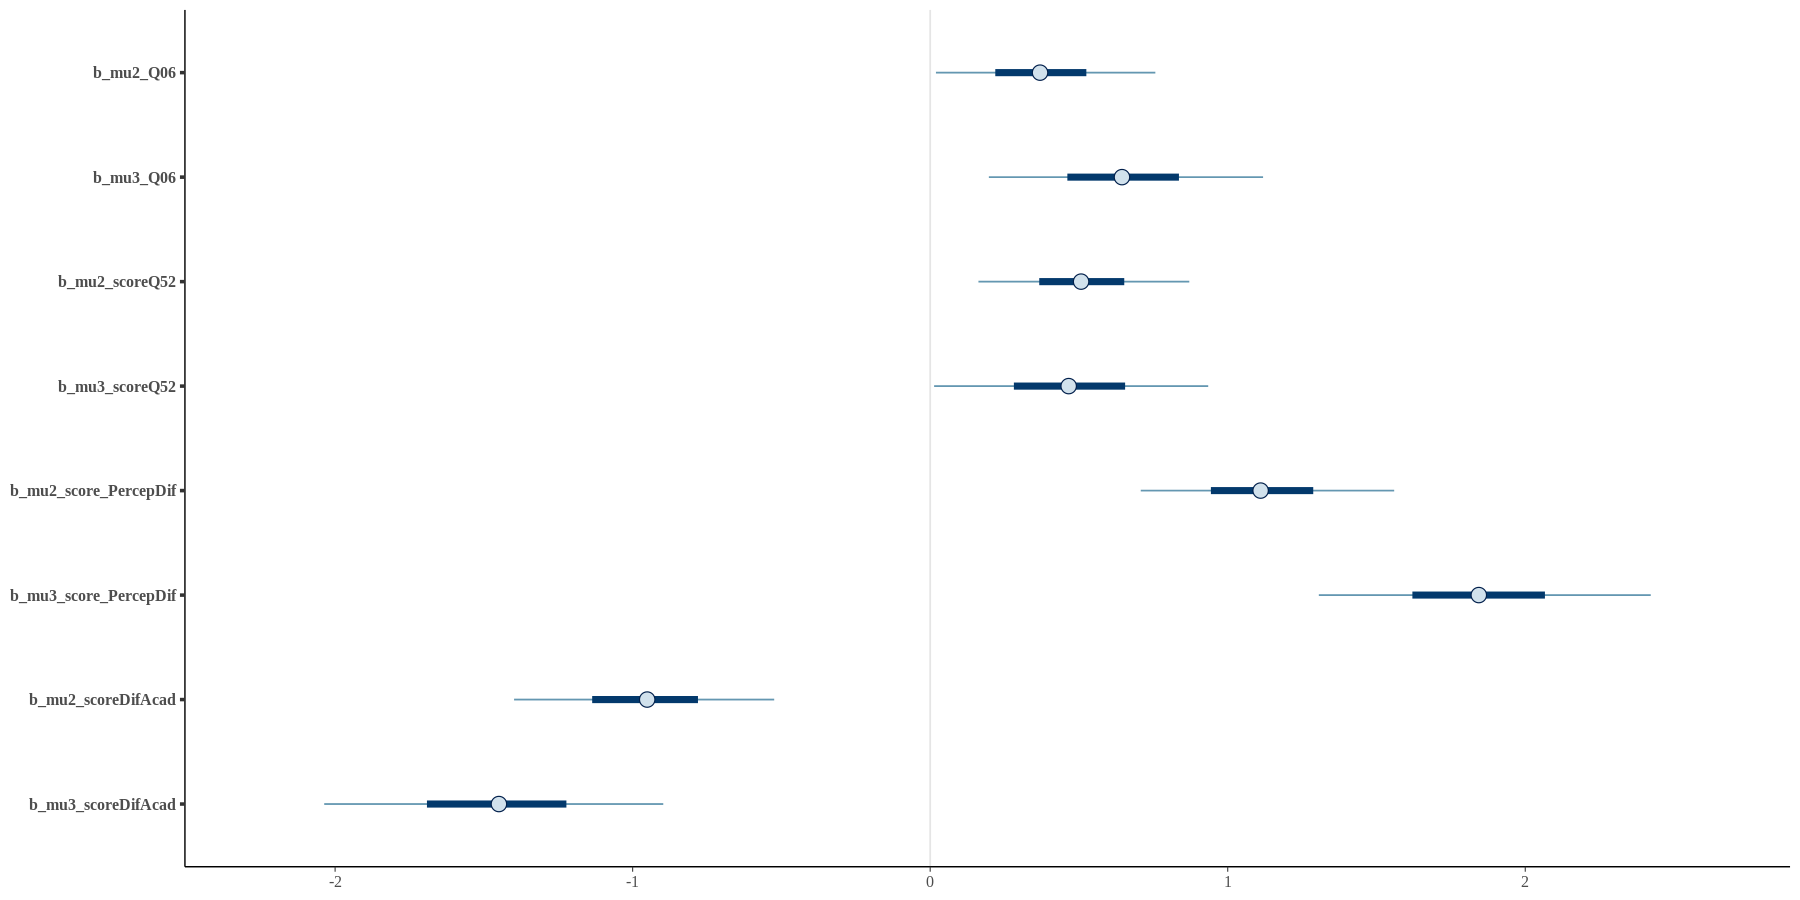

In [ ]:
mcmc_plot(modelo_cauchy_prior_reduzido_25_2,var = c('b_mu2_Q06' ,'b_mu3_Q06','b_mu2_scoreQ52' , 'b_mu3_scoreQ52' , 'b_mu2_score_PercepDif' , 'b_mu3_score_PercepDif' , 'b_mu2_scoreDifAcad', 'b_mu3_scoreDifAcad'  ))

Claramente a variável com maior efeito é  score_PercepDif e  score_PercepDif

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


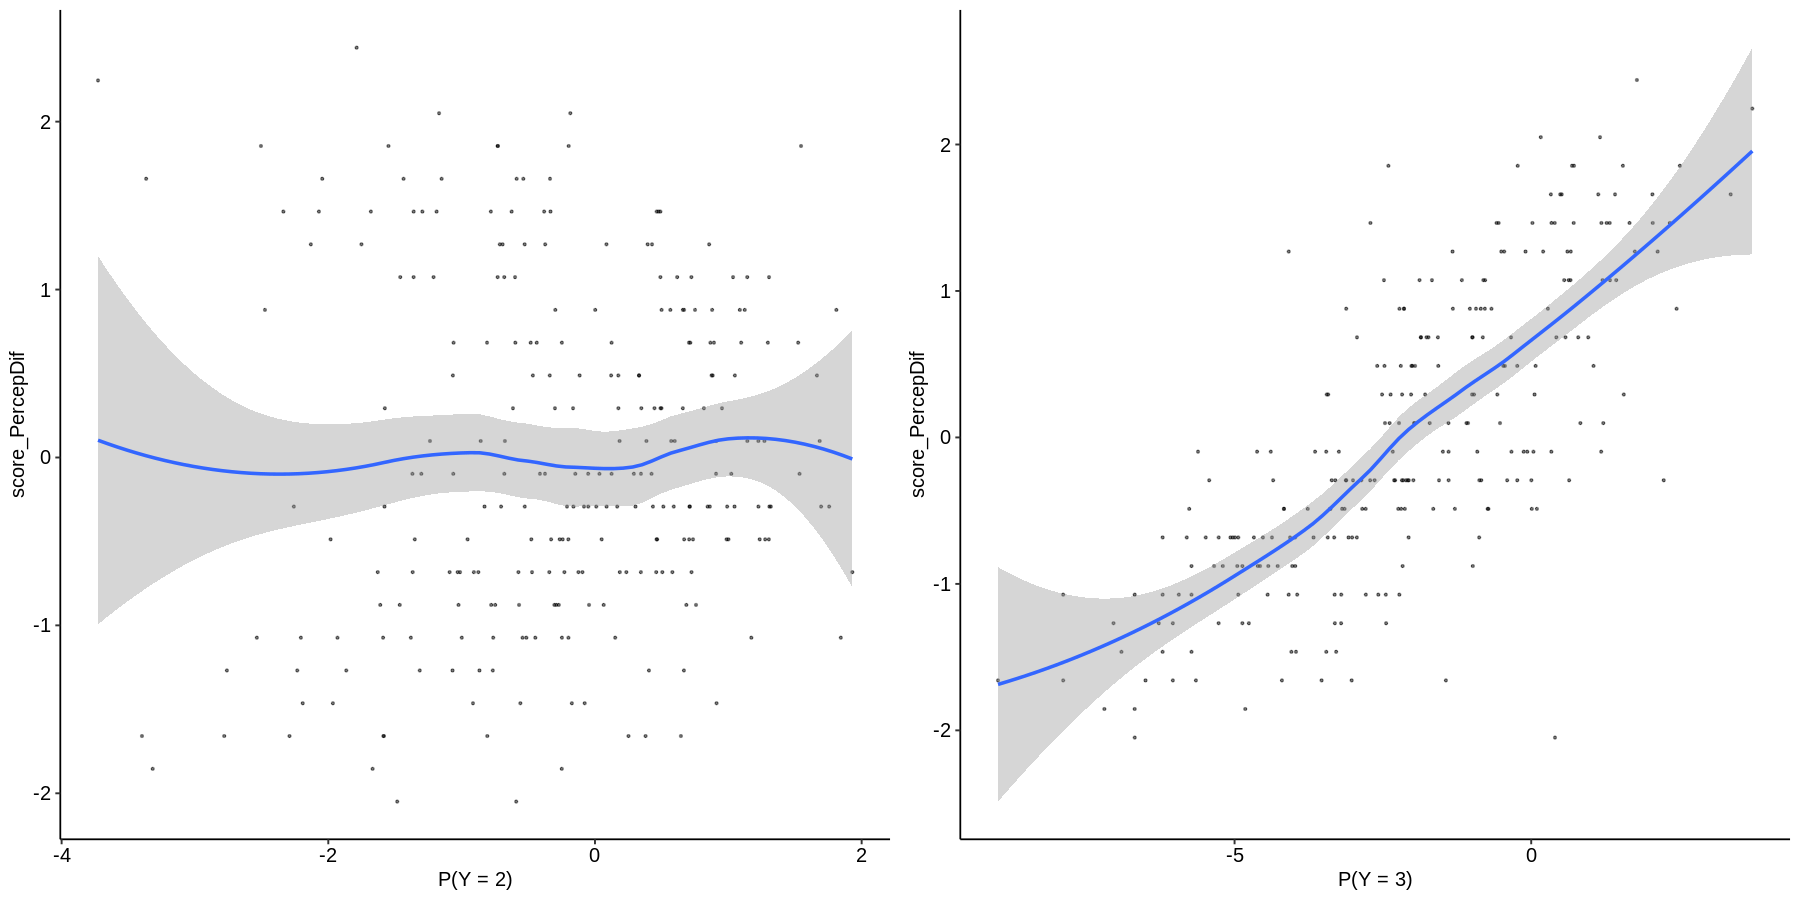

In [ ]:
ggarrange(
ggplot(numeric_data, aes(x = `P(Y = 2)`, y = score_PercepDif)) +
  geom_point(size = 0.5, alpha = 0.5) +
  geom_smooth(method = "loess") +
  theme_pubr() ,

ggplot(numeric_data, aes(x = `P(Y = 3)`, y = score_PercepDif)) +
  geom_point(size = 0.5, alpha = 0.5) +
  geom_smooth(method = "loess") +
  theme_pubr()

)

scorePercepDif: score sobre percepção de dificuldades (sentido negativo)

Há necessidade de utilizar, pois observa-se um padrão não linear no primeiro gráfico à esquerda

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


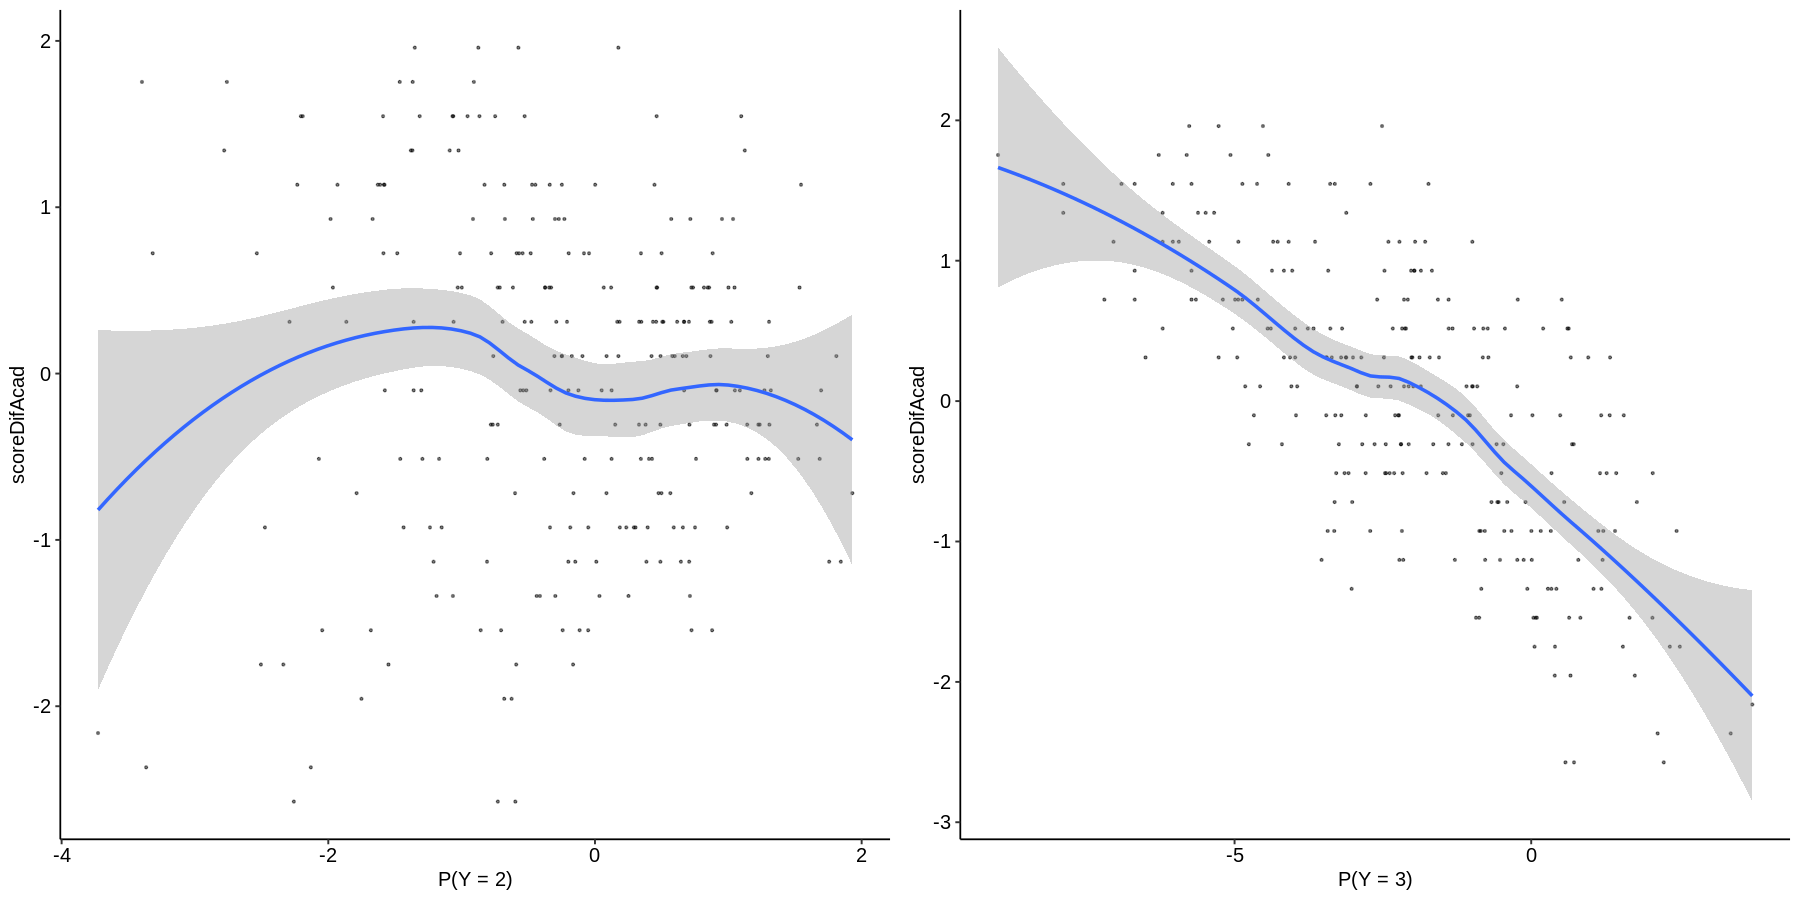

In [ ]:
ggarrange(
ggplot(numeric_data, aes(x = `P(Y = 2)`, y = scoreDifAcad)) +
  geom_point(size = 0.5, alpha = 0.5) +
  geom_smooth(method = "loess") +
  theme_pubr() ,

ggplot(numeric_data, aes(x = `P(Y = 3)`, y = scoreDifAcad)) +
  geom_point(size = 0.5, alpha = 0.5) +
  geom_smooth(method = "loess") +
  theme_pubr()

)

scoreDifAcad: score sobre dificuldade acadêmica (sentido positivo)



Há necessidade de utilizar splines, pois observa-se um padrão não linear no primeiro gráfico à esquerda

In [ ]:
# Modelos com splines, s(year, bs = "bs"), para os modelos de regressão em que há não linearidade. No caso, o modelo para P(nivelSQR = 2)
formula_modelo_reduzido_25_2_spline <- bf(nivelSRQ   ~ Q17 + Q20 + Q05 + s(scoreDifAcad) + s(score_PercepDif) + scorePTC + scoreQ52 + Q06 )



In [ ]:
prior_default_reduzido_25_2_spline = default_prior(formula_modelo_reduzido_25_2_spline, data  = trainTransformed, family = categorical(link = "logit"))  %>% as.data.frame()


coef_mu2_b_reduzido_25_2_spline = prior_default_reduzido_25_2_spline  %>% filter(dpar == 'mu2' & class =='b')    %>% select(coef)  %>% pull()
coef_mu3_b_reduzido_25_2_spline = prior_default_reduzido_25_2_spline   %>% filter(dpar == 'mu3' & class =='b')    %>% select(coef)  %>% pull()
coef_splines = prior_default_reduzido_25_2_spline %>%  filter(dpar == 'mu2' & class =='sds')  %>% select(coef) %>% pull()


mod_prior_reduzido_25_2_spline = c(
  # prioris dos coef lineares
  prior_string("cauchy(0, 10)", class = "Intercept", dpar = c("mu2", "mu3")),
   prior_string("cauchy(0, 2.5)", class = "b", coef= coef_mu2_b_reduzido_25_2_spline,  dpar = "mu2"),
   prior_string("cauchy(0, 2.5)", class = "b", coef= coef_mu3_b_reduzido_25_2_spline,  dpar = "mu3"),
  # prioris do spline
   prior_string("exponential(1)", class = "sds", coef = coef_splines 	,  dpar = "mu2")


)



In [ ]:
# Ajusta o modelo utilizando as prioris de Gelman
modelo_cauchy_prior_reduzido_25_2_spline <- brm(formula_modelo_reduzido_25_2_spline,
                                      cores = n_cores,
                                      family = categorical(link = "logit"),
                                      data = trainTransformed,
                                      chains = 4,
                                      iter = 3000,
                                      warmup = 1000,
                                      prior = mod_prior_reduzido_25_2_spline,
                                      save_pars = save_pars(all = TRUE),
                                      seed = 13)


Warning message:
“The global prior 'cauchy(0, 2.5)' of class 'b' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Warning message:
“The global prior 'cauchy(0, 2.5)' of class 'b' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Warning message:
“The global prior 'exponential(1)' of class 'sds' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?default_prior for more details.”
Compiling Stan program...

Start sampling

Warning message:
“There were 3 divergent transitions after warmup. See

In [ ]:
modelo_cauchy_prior_reduzido_25_2_spline  <- add_criterion(modelo_cauchy_prior_reduzido_25_2_spline, "loo",moment_match = TRUE)
modelo_cauchy_prior_reduzido_25_2 <- add_criterion(modelo_cauchy_prior_reduzido_25_2, "loo",moment_match = TRUE)

In [ ]:
loo_compare(modelo_cauchy_prior_reduzido_25_2_spline,modelo_cauchy_prior_reduzido_25_2)

,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
modelo_cauchy_prior_reduzido_25_2_spline,0.00000000,0.000000,-199.3361,11.43835,30.60931,2.368318,398.6723,22.87670
modelo_cauchy_prior_reduzido_25_2,-0.09363889,2.458812,-199.4298,11.45847,26.73566,1.994309,398.8596,22.91694


Na verdade, o spline piorou o desempenho do modelo. Portanto, vamos optar pelo modelo mais simples

#Diagnóstico

Como a distribuição a posteriori não tem forma analítica tratável, foi necessário simulá-la utilizando o método de amostragem NUTS. Antes de realizar a inferência, é preciso diagnosticar o método MCMC para garantir que as cadeias tenham de fato convergido para a distribuição a posteriori.

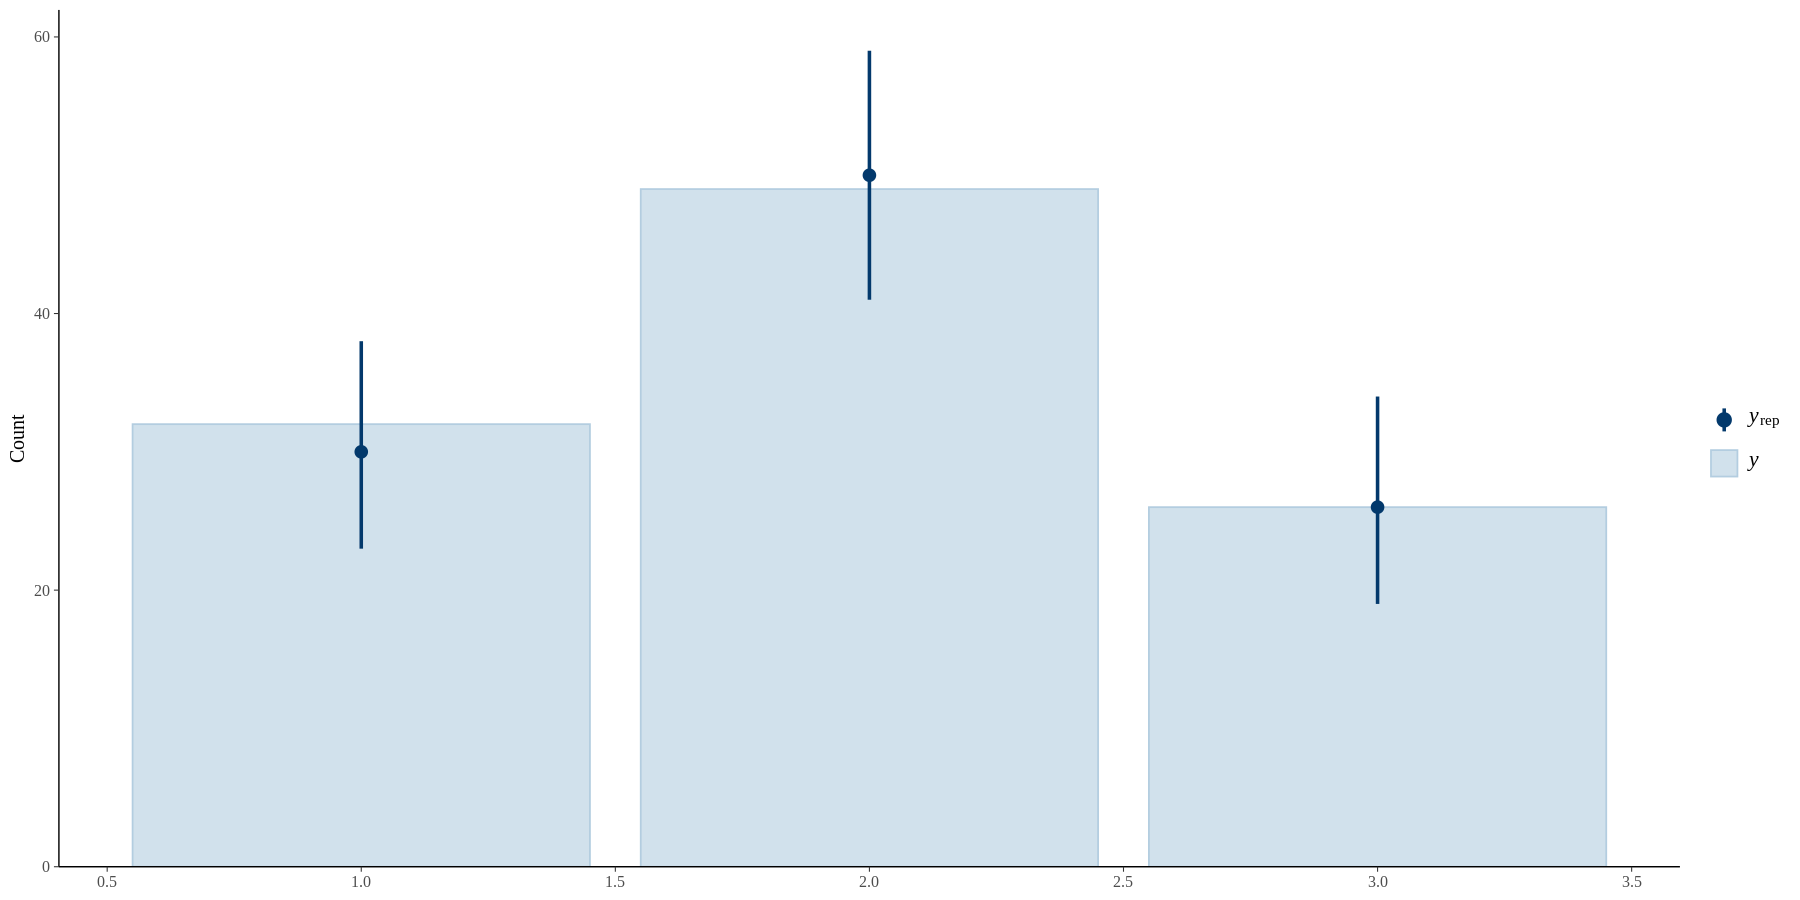

In [ ]:
pp_check(modelo_cauchy_prior_reduzido_25_2, ndraws =1000, type = "bars", newdata  = testTransformed)

O gráfico acima refere-se ao procedimento de "Posterior predictive checking", descrito na seção 6 de [1]. Em resumo, esse gráfico compara simulações obtidas a partir da distribuição preditiva a posteriori (yrep) com o que foi observado de fato nos dados (y). Espera-se que y e yrep estejam próximos, o que indica que o modelo proposto capturou parte da estrutura geradora dos dados. Dada a natureza discreta dos dados, optou-se por apresentar o resultado em um gráfico de barras e utilizar o conjunto de teste para obter y. Nele, a linha azul representa um intervalo de 95% de credibilidade para a média das simulações, que está bastante próximo do que foi observado.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


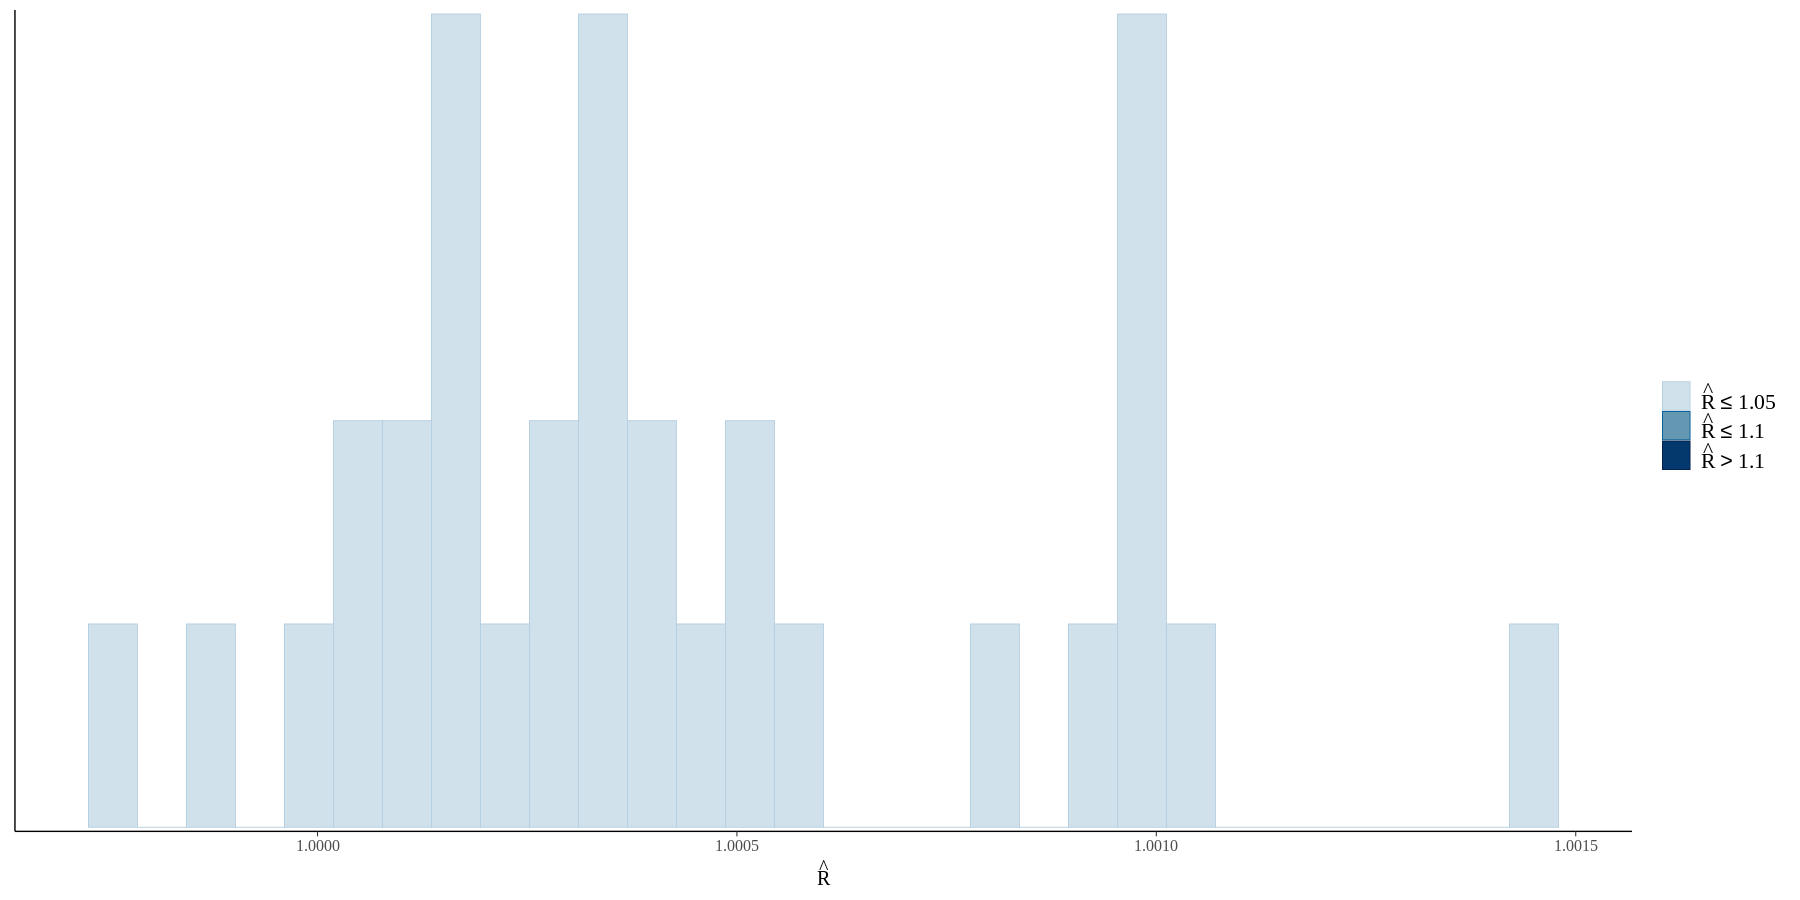

In [ ]:
mcmc_plot(modelo_cauchy_prior_reduzido_25_2, type = 'rhat_hist')

O Rhat é frequentemente utilizado para avaliar convergência dos métodos MCMC.
A referência do trabalho para essa técnica de diagnóstico é:

"The Rhat function produces R-hat convergence diagnostic, which compares the between- and within-chain estimates for model parameters and other univariate quantities of interest. If chains have not mixed well (ie, the between- and within-chain estimates don't agree), R-hat is larger than 1. We recommend running at least four chains by default and only using the sample if R-hat is less than 1.05. Stan reports R-hat which is the maximum of rank normalized split-R-hat and rank normalized folded-split-R-hat, which works for thick tailed distributions and is sensitive also to differences in scale.[4]"

Notemos que, o Rhat não indica nenhum problema.




In [ ]:
summary(modelo_cauchy_prior_reduzido_25_2)

 Family: categorical 
  Links: mu2 = logit; mu3 = logit 
Formula: nivelSRQ ~ Q17 + Q20 + Q05 + scoreDifAcad + score_PercepDif + scorePTC + scoreQ52 + Q06 
   Data: trainTransformed (Number of observations: 255) 
  Draws: 4 chains, each with iter = 3000; warmup = 1000; thin = 1;
         total post-warmup draws = 8000

Regression Coefficients:
                         Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
mu2_Intercept                1.85      0.83     0.24     3.54 1.00     4430
mu3_Intercept               -0.11      0.92    -1.89     1.74 1.00     5229
mu2_Q17Sim                   0.07      0.43    -0.75     0.91 1.00     8306
mu2_Q202                     1.20      1.98    -1.64     5.82 1.00     5435
mu2_Q203                    -0.65      0.89    -2.47     1.03 1.00     4950
mu2_Q204                     0.59      0.82    -1.08     2.20 1.00     4833
mu2_Q205                    -0.43      0.80    -2.08     1.10 1.00     4592
mu2_Q05Bissexual            -0.32      0.48    

Outras formas de checar a convergência, segundo o manual da stan [4], são :

 The ess_bulk function produces an estimated Bulk Effective Sample Size (bulk-ESS) using rank normalized draws. Bulk-ESS is useful measure for sampling efficiency in the bulk of the distribution (related e.g. to efficiency of mean and median estimates), and is well defined even if the chains do not have finite mean or variance.

The ess_tail function produces an estimated Tail Effective Sample Size (tail-ESS) by computing the minimum of effective sample sizes for 5% and 95% quantiles. Tail-ESS is useful measure for sampling efficiency in the tails of the distribution (related e.g. to efficiency of variance and tail quantile estimates).

Both bulk-ESS and tail-ESS should be at least 100
(approximately) per Markov Chain in order to be reliable and indicate that estimates of respective posterior quantiles are reliable "

**Note, pela inspeção das colunas Bulk_ESS e Tail_ESS da tabela acima, que o modelo não apresenta problemas com essas medidas**

# Interpretação

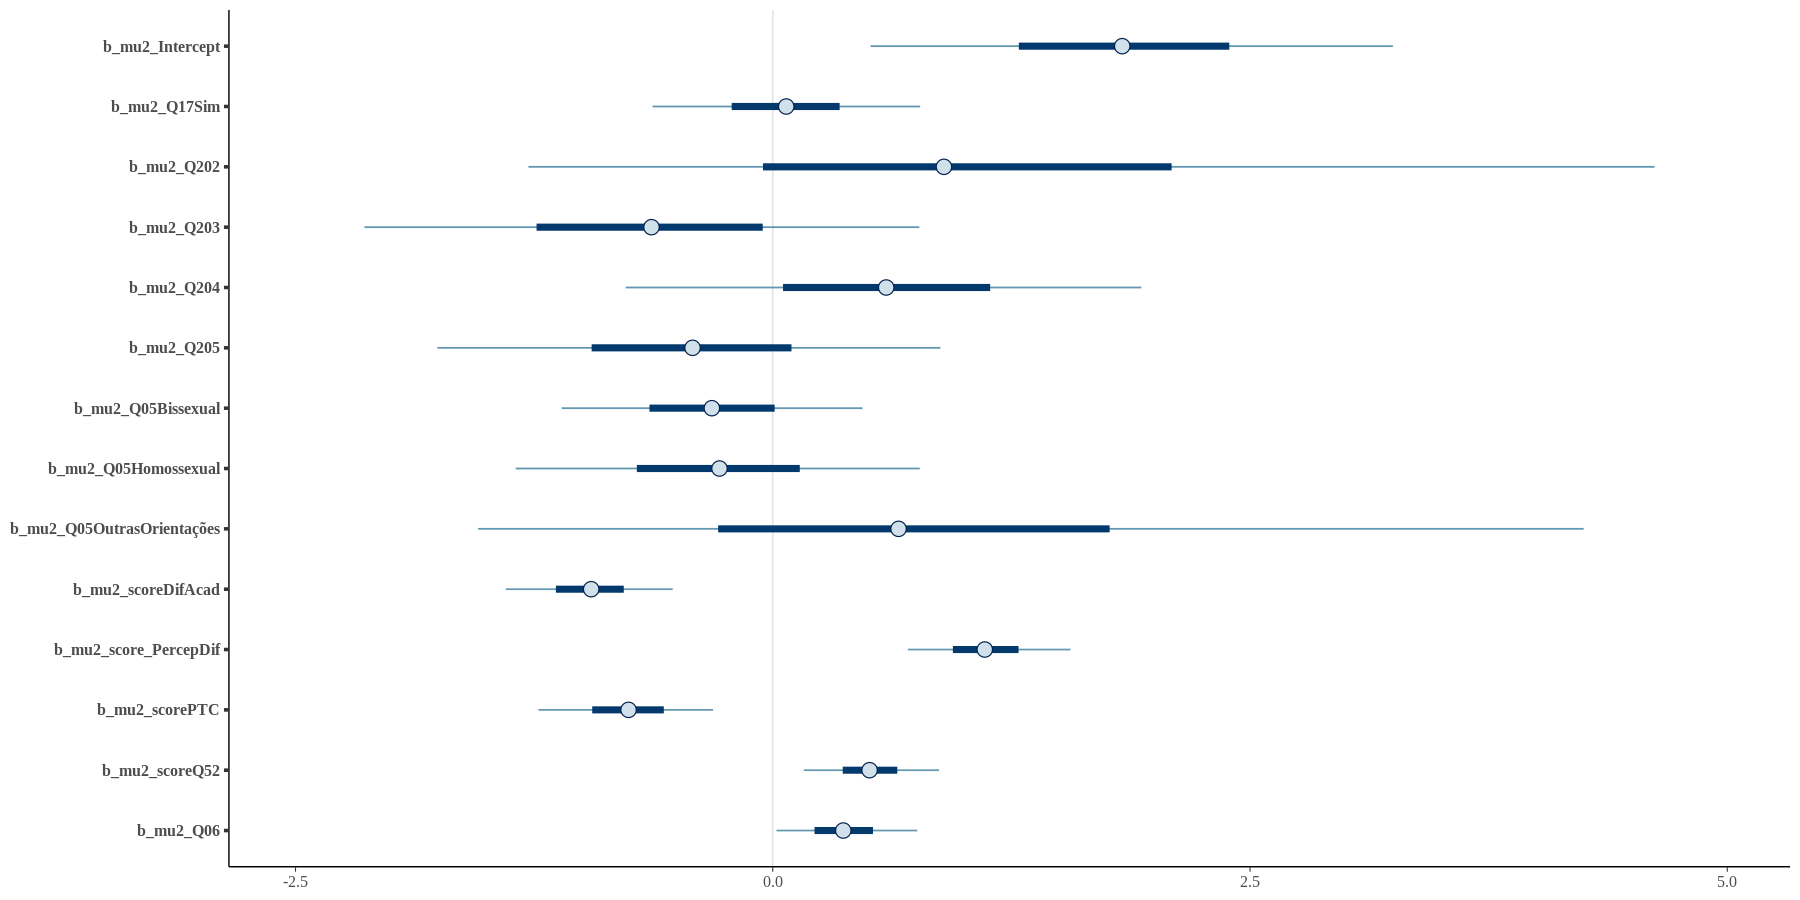

In [ ]:
mcmc_plot(modelo_cauchy_prior_reduzido_25_2, var = "^b_mu2_", regex = T)

In [ ]:
posterior_summary(modelo_cauchy_prior_reduzido_25_2, var = "^b_mu2_", regex = T) %>% round(4)

,Estimate,Est.Error,Q2.5,Q97.5
b_mu2_Intercept,1.8486,0.8289,0.2411,3.5357
b_mu2_Q17Sim,0.0684,0.4274,-0.7527,0.9101
b_mu2_Q202,1.2048,1.9819,-1.6432,5.8236
b_mu2_Q203,-0.6549,0.8890,-2.4737,1.0290
b_mu2_Q204,0.5874,0.8224,-1.0779,2.2022
b_mu2_Q205,-0.4317,0.8010,-2.0754,1.0999
b_mu2_Q05Bissexual,-0.3177,0.4842,-1.2607,0.6334
b_mu2_Q05Homossexual,-0.2881,0.6419,-1.5450,0.9403
b_mu2_Q05OutrasOrientações,0.9064,1.8687,-1.9499,5.4913
b_mu2_scoreDifAcad,-0.9572,0.2662,-1.4833,-0.4486


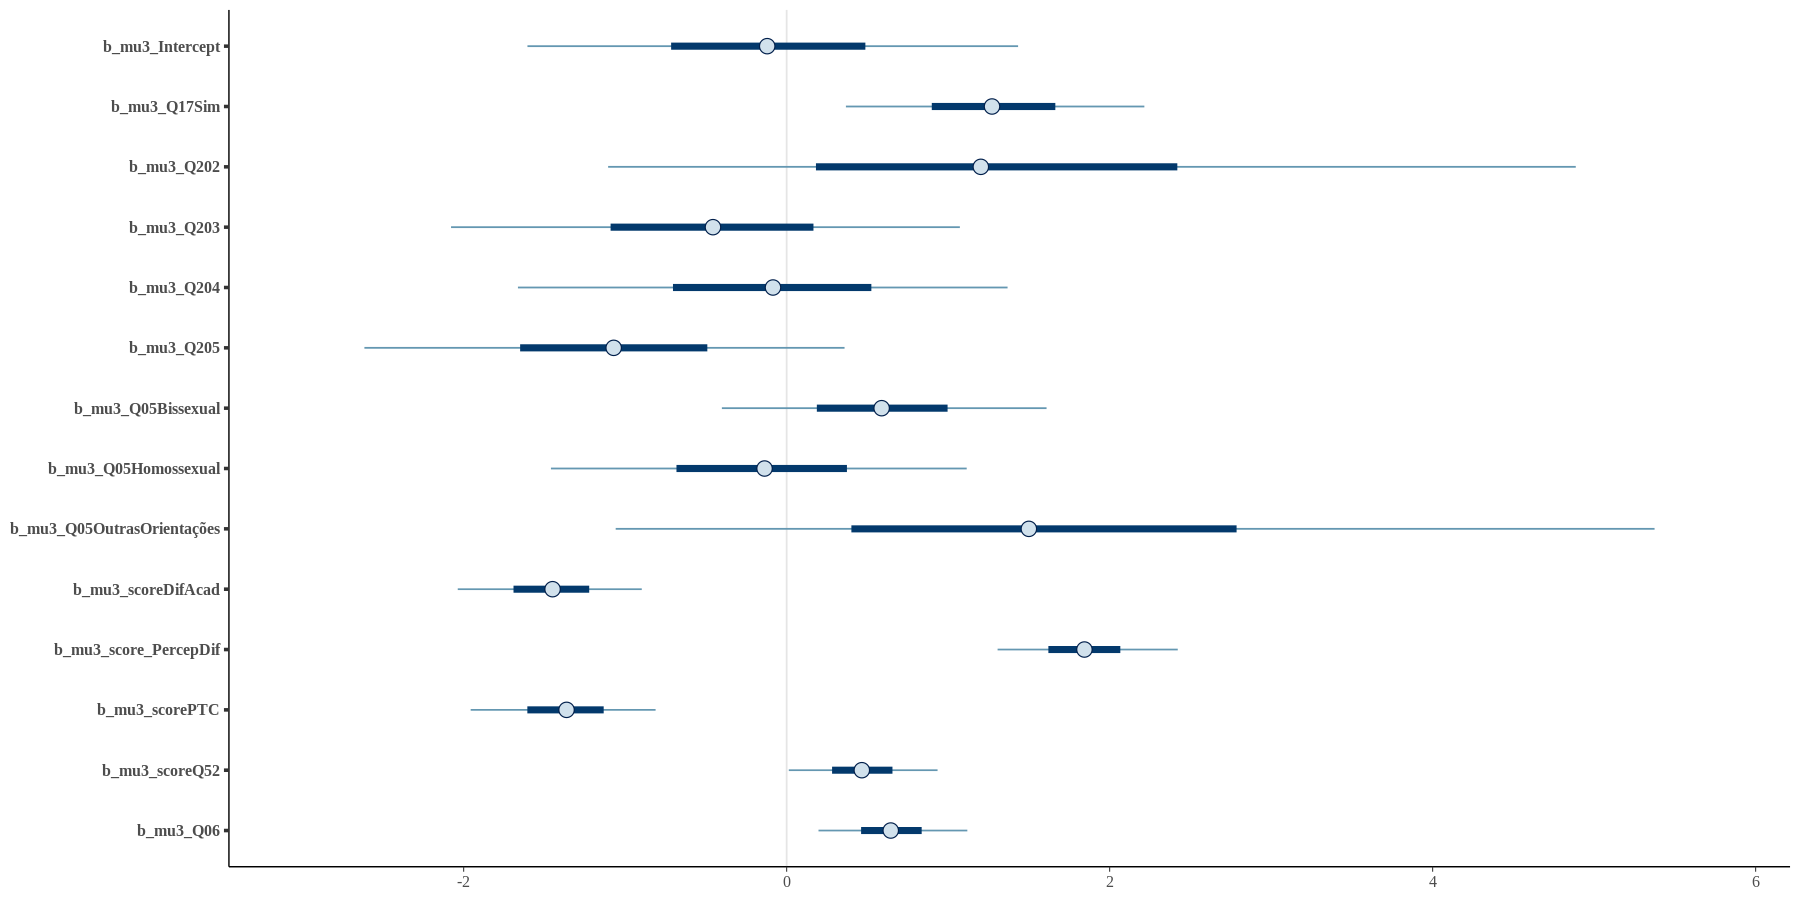

In [ ]:
mcmc_plot(modelo_cauchy_prior_reduzido_25_2, var = "^b_mu3_", regex = T)

In [ ]:
posterior_summary(modelo_cauchy_prior_reduzido_25_2, var = "^b_mu3_", regex = T) %>% round(4)

,Estimate,Est.Error,Q2.5,Q97.5
b_mu3_Intercept,-0.1072,0.9171,-1.8871,1.7391
b_mu3_Q17Sim,1.2805,0.5612,0.1891,2.4067
b_mu3_Q202,1.4813,2.0334,-1.5213,6.2236
b_mu3_Q203,-0.4717,0.9530,-2.3760,1.3747
b_mu3_Q204,-0.1049,0.9376,-2.0037,1.6788
b_mu3_Q205,-1.0857,0.8986,-2.9377,0.6442
b_mu3_Q05Bissexual,0.5926,0.6143,-0.6319,1.8172
b_mu3_Q05Homossexual,-0.1561,0.7901,-1.7414,1.3599
b_mu3_Q05OutrasOrientações,1.7448,2.0569,-1.5376,6.4784
b_mu3_scoreDifAcad,-1.4585,0.3467,-2.1513,-0.8001


O score sobre percepção de dificuldades (com sentido negativo) obteve um coeficiente de regressão positivo tanto no modelo de regressão para o nível 2 de SQR quanto para o nível 3 de SQR. Isso significa que quanto maior for a dificuldade percebida pelo aluno, maior é o risco associado ao aluno. Já o scoreDifAcad, que avalia a dificuldade acadêmica (com sentido positivo), também teve um grande efeito, porém com sinal contrário devido à orientação da escala.

O ScorePTC, que avalia o pertencimento na universidade (com sentido positivo), obteve coeficiente negativo tanto para o nível 2 de SQR quanto para o nível 3 de SQR. Isso indica que quanto menor for o pertencimento (medido por essa escala), maior é o risco do aluno

A resposta positiva para Q17: Possui diagnósticos em saúde mental, obteve coeficiente negativo tanto para o nível 2 de SQR quanto para o nível 3 de SQR. Isso indica que os alunos que têm diagnóstico em saúde mental estão nos níveis mais altos de SQR

Os coeficientes relacionados à orientação sexual, nesse caso tomando os heterossexuais como referência, para homossexuais, bissexuais e outras orientações tiveram coeficientes positivos. Isso indica que indivíduos que têm orientações diferentes da heterossexual estão associados aos níveis mais altos de SQR.




# Predição

Em um modelo bayesiano, a predição é realizada amostrando da distribuição preditiva a posteriori. Como se trata de uma distribuição categórica, a predição será do tipo:
-  P(Y = 0) , nível 1 de SQR
-  P(Y = 1) , nível 2 de SQR
-  P(Y = 2) , nível 3 de SQR



In [ ]:
X_test = testTransformed %>% select(c(-nivelSRQ))
y_test = testTransformed$nivelSRQ

In [ ]:
table(y_test)

y_test
 1  2  3 
32 49 26 

Note que há um desbalanceamento entre as classes de nivelSRQ

## Modelo frequentista completo

In [ ]:
library(nnet)
modelo_frequentista <- multinom(nivelSRQ  ~  Q02 + Q03 + Q04 + Q05 + moradia + Q09  + Q11+ Q13 + Q15 + Q17 + Q19 + Q21  + Q06 + Q20 + score_PercepDif + scoreDifAcad + scoreRC + scorePTC + scoreQ52 + scoreQ53, data = trainTransformed)
predict_frequentista <- predict(modelo_frequentista,newdata = X_test)
cm_frequentista <- confusionMatrix(predict_frequentista, y_test)

cm_frequentista


Attaching package: ‘nnet’


The following object is masked from ‘package:mgcv’:

    multinom




# weights:  114 (74 variable)
initial  value 280.146134 
iter  10 value 161.953923
iter  20 value 136.974638
iter  30 value 132.636056
iter  40 value 132.318695
iter  50 value 132.225651
iter  60 value 132.190825
iter  70 value 132.170726
iter  80 value 132.170228
final  value 132.170225 
converged


Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 18 14  1
         2 12 25 11
         3  2 10 14

Overall Statistics
                                          
               Accuracy : 0.5327          
                 95% CI : (0.4338, 0.6298)
    No Information Rate : 0.4579          
    P-Value [Acc > NIR] : 0.07304         
                                          
                  Kappa : 0.2736          
                                          
 Mcnemar's Test P-Value : 0.91118         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.5625   0.5102   0.5385
Specificity            0.8000   0.6034   0.8519
Pos Pred Value         0.5455   0.5208   0.5385
Neg Pred Value         0.8108   0.5932   0.8519
Prevalence             0.2991   0.4579   0.2430
Detection Rate         0.1682   0.2336   0.1308
Detection Prevalence   0.3084   0.4486   0.2430
Balanced Accuracy      0.6813   0.5568   0.6952

OBS : O modelo ajustado pelo nnet é um " single-hidden-layer neural network, possibly with skip-layer connections"

## Modelo bayesiano completo

In [ ]:
# predição feita considerando 1000 simulações da distribuição preditiva posteriori
predict <-predict(modelo_cauchy_prior,newdata  =X_test , ntrys = 1000)
y_pred = as.factor(apply(predict, 1 ,  which.max))
cm <- confusionMatrix(y_pred, y_test)


In [ ]:
cm

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 18  8  0
         2 12 31 11
         3  2 10 15

Overall Statistics
                                          
               Accuracy : 0.5981          
                 95% CI : (0.4989, 0.6918)
    No Information Rate : 0.4579          
    P-Value [Acc > NIR] : 0.002478        
                                          
                  Kappa : 0.367           
                                          
 Mcnemar's Test P-Value : 0.415721        

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.5625   0.6327   0.5769
Specificity            0.8933   0.6034   0.8519
Pos Pred Value         0.6923   0.5741   0.5556
Neg Pred Value         0.8272   0.6604   0.8625
Prevalence             0.2991   0.4579   0.2430
Detection Rate         0.1682   0.2897   0.1402
Detection Prevalence   0.2430   0.5047   0.2523
Balanced Accuracy      0.7279   0.6181   0.7144

## Modelo bayesiano reduzido com Spline

In [ ]:
# predição feita considerando 1000 simulações da distribuição preditiva posteriori
predict <-predict(modelo_cauchy_prior_reduzido_25_2_spline,newdata  =X_test , ntrys = 1000)
y_pred = as.factor(apply(predict, 1 ,  which.max))
cm <- confusionMatrix(y_pred, y_test)


In [ ]:
cm

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 19  3  0
         2 13 39 10
         3  0  7 16

Overall Statistics
                                         
               Accuracy : 0.6916         
                 95% CI : (0.595, 0.7773)
    No Information Rate : 0.4579         
    P-Value [Acc > NIR] : 8.91e-07       
                                         
                  Kappa : 0.5033         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.5938   0.7959   0.6154
Specificity            0.9600   0.6034   0.9136
Pos Pred Value         0.8636   0.6290   0.6957
Neg Pred Value         0.8471   0.7778   0.8810
Prevalence             0.2991   0.4579   0.2430
Detection Rate         0.1776   0.3645   0.1495
Detection Prevalence   0.2056   0.5794   0.2150
Balanced Accuracy      0.7769   0.6997   0.7645

## Modelo bayesiano reduzido sem spline

In [ ]:
# predição feita considerando 1000 simulações da distribuição preditiva posteriori
predict <-predict(modelo_cauchy_prior_reduzido_25_2,newdata  =X_test , ntrys = 1000)
y_pred = as.factor(apply(predict, 1 ,  which.max))
cm <- confusionMatrix(y_pred, y_test)


In [ ]:
cm

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 18  3  0
         2 13 37 10
         3  1  9 16

Overall Statistics
                                         
               Accuracy : 0.6636         
                 95% CI : (0.5658, 0.752)
    No Information Rate : 0.4579         
    P-Value [Acc > NIR] : 1.451e-05      
                                         
                  Kappa : 0.4621         
                                         
 Mcnemar's Test P-Value : 0.06285        

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.5625   0.7551   0.6154
Specificity            0.9600   0.6034   0.8765
Pos Pred Value         0.8571   0.6167   0.6154
Neg Pred Value         0.8372   0.7447   0.8765
Prevalence             0.2991   0.4579   0.2430
Detection Rate         0.1682   0.3458   0.1495
Detection Prevalence   0.1963   0.5607   0.2430
Balanced Accuracy      0.7612   0.6793   0.7460

## modelo baseado em arvore

In [ ]:
library(rpart)

In [ ]:
tree <- rpart(nivelSRQ  ~  Q02 + Q03 + Q04 + Q05 + moradia + Q09  + Q11+ Q13 + Q15 + Q17 + Q19 + Q21  + Q06 + Q20 + score_PercepDif + scoreDifAcad + scoreRC + scorePTC + scoreQ52 + scoreQ53, data = trainTransformed)

In [ ]:
y_pred_tree =  predict(tree,newdata = X_test)

In [ ]:
y_pred_tree = as.factor(apply(y_pred_tree, 1 ,  which.max))

In [ ]:
cm_tree <- confusionMatrix(y_pred_tree, y_test)


In [ ]:
cm_tree

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 11  6  1
         2 20 37 19
         3  1  6  6

Overall Statistics
                                          
               Accuracy : 0.5047          
                 95% CI : (0.4063, 0.6028)
    No Information Rate : 0.4579          
    P-Value [Acc > NIR] : 0.191155        
                                          
                  Kappa : 0.1674          
                                          
 Mcnemar's Test P-Value : 0.002526        

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.3438   0.7551  0.23077
Specificity            0.9067   0.3276  0.91358
Pos Pred Value         0.6111   0.4868  0.46154
Neg Pred Value         0.7640   0.6129  0.78723
Prevalence             0.2991   0.4579  0.24299
Detection Rate         0.1028   0.3458  0.05607
Detection Prevalence   0.1682   0.7103  0.12150
Balanced Accuracy      0.6252   0.5413  0.57217

Proseguiremos com avaliação desse modelo considerando que os devidos diagnósticos foram feitos

# Conslusão

Das diversas técnicas que tentamos, com enfoques diferentes, concluímos que, no final das contas, a modelagem através de GAMLSS obteve uma acurácia surpreendentemente boa, e ao mesmo tempo preservou a interpretabilidade do modelo.

A modelagem por redes bayesianas conseguiu obter uma explicação plausível, mas, devida a complexidade da estrutura de correlação dos dados, não há razão de dar muito peso a sua interpretação, sem falar do poder preditivo menos que satisfatório.

Finalmente, a modelagem por métodos de aprendizado de máquina que foi tentada obteve um sucesso razoável , atingindo performance similar aos modelos de regressão tentados, mas não os superando. Também, a interpretação do modelo é importante para esse problema, então não usariamos esse tipo de modelagem sem acoplar uma metodologia de explicabilidade de modelos de aprendizado de máquina (como SHAP e LIME, por exemplo).

O melhor modelo de regressão foi um modelo multinomial logito bayesiano, após seleção de variáveis e usando dists. a priori fracamente informativas, obtendo acurácia de ~68% . Por outro lado, o melhor modelo de aprendizado de máquina foi o Gradient Boosting Classifier, com acurácia final ~62%.

Além disso, o perfil de risco construído pela análise de agrupamento pode ser utilizado posteriormente para direcionar intervenções de saúde mental ao grupo de risco identificado. Também está aberta a possibilidade de ser construído um perfil alternativo a partir dos resultados da regressão.

# Ref

[1] GELMAN, Andrew et al. Bayesian workflow. arXiv preprint arXiv:2011.01808, 2020. Disponível em  : https://arxiv.org/pdf/2011.01808


[2] GELMAN, Andrew et al. A weakly informative default prior distribution for logistic and other regression models. 2008.




[4] https://mc-stan.org/rstan/reference/Rhat.html


[5] https://psyc-bayes-notes.netlify.app/model-comparison-and-regularization.html